# Traveling Salesman problem
Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?

## Input data

In [1]:
import numpy as np # for fast arithmetics
import matplotlib.pyplot as plt

In [2]:
# City names alphabetically
cityNames = ['Винница','Днепр','Житомир','Запорожье','Ивано-Франковск','Киев','Кропивницкий','Луцк','Львов','Николаев','Одесса','Полтава','Ровно','Сумы','Тернополь','Ужгород','Харьков','Херсон','Хмельницкий','Черкассы','Чернигов','Черновцы']
# Geographical coordinates in degrees (for visualization)
latitude = np.array([49.2347128, 48.4622135, 50.2678654, 47.8561438, 48.9117518, 50.401699, 48.5187443, 50.73977, 49.8326679, 46.9329791,46.4598865,49.6021346,50.6199879,50.9077873,49.5483334,48.6208922,49.9934789,46.6353956,49.4229619,49.4444119,51.4981791,48.2920574])
longitude = np.array([28.3995942, 34.8602731, 28.6036778, 35.0352701, 24.6470892, 30.2525101, 32.1456232, 25.2639651, 23.9421958, 31.8679134, 30.5717031,34.4871983,26.1815768,34.7280598,25.5276293,22.2178427,36.1603433,32.5468272,26.9170934,31.9897273,31.2193102,25.8657969])
# https://distancecalculator.globefeed.com/Ukraine_Distance_Calculator.asp
import math # factorial
N = len(cityNames); print("Number of cities: ",N)
print("Possible ways: ",math.factorial(N-1))
print(cityNames)

Number of cities:  22
Possible ways:  51090942171709440000
['Винница', 'Днепр', 'Житомир', 'Запорожье', 'Ивано-Франковск', 'Киев', 'Кропивницкий', 'Луцк', 'Львов', 'Николаев', 'Одесса', 'Полтава', 'Ровно', 'Сумы', 'Тернополь', 'Ужгород', 'Харьков', 'Херсон', 'Хмельницкий', 'Черкассы', 'Чернигов', 'Черновцы']


In [3]:
# Distance matrix using maps.google.com, by car.
d = np.array([
    [  0, 588, 128, 651, 368, 268, 322, 389, 364, 431, 426, 595, 277, 603, 236, 585, 707, 497, 120, 335, 411, 288],
    [588,   0, 596,85.4, 962, 480, 247, 875, 957, 322, 454, 164, 805, 358, 829,1180, 217, 329, 714, 286, 542, 844],
    [128, 596,   0, 690, 413, 140, 392, 261, 402, 507, 501, 480, 188, 475, 280, 657, 617, 573, 183, 308, 283, 371],
    [651,85.4, 690,   0,1026, 538, 310, 952,1021, 376, 508, 264, 860, 437, 893,1243, 297, 314, 778, 350, 620, 908],
    [368, 962, 413,1026,   0, 560, 694, 263, 132, 780, 798, 931, 275, 895, 130, 293,1082, 869, 235, 696, 746, 135],
    [268, 480, 140, 538, 560,   0, 303, 400, 541, 481, 475, 344, 327, 369, 420, 796, 456, 547, 323, 192, 142, 531],
    [322, 247, 392, 310, 694, 303,   0, 670, 693, 182, 309, 246, 598, 426, 564, 915, 386, 243, 449, 129, 428, 579],
    [389, 875, 261, 952, 263, 400, 670,   0, 180, 779, 774, 740,72.6, 734, 167, 426, 877, 845, 257, 587, 543, 336],
    [364, 957, 402,1021, 132, 541, 693, 180,   0, 802, 797, 879, 211, 874, 134, 268,1018, 867, 241, 727, 683, 276],
    [431, 322, 507, 376, 780, 481, 182, 779, 802,   0, 132, 428, 706, 606, 673,1024, 542,70.1, 558, 311, 610, 688],
    [426, 454, 501, 508, 798, 475, 309, 774, 797, 132,   0, 560, 702, 770, 624,1020, 674, 201, 553, 417, 611, 683],
    [595, 164, 480, 264, 931, 344, 246, 740, 879, 428, 560,   0, 668, 177, 760,1128, 143, 491, 664, 243, 405, 827],
    [277, 805, 188, 860, 275, 327, 598,72.6, 211, 706, 702, 668,   0, 663, 159, 467, 804, 774, 195, 516, 471, 328],
    [603, 358, 475, 437, 895, 369, 426, 734, 874, 606, 770, 177, 663,   0, 783,1152, 187, 668, 656, 325, 297, 895],
    [236, 829, 280, 893, 130, 420, 564, 167, 134, 673, 624, 760, 159, 783,   0, 352, 897, 739, 111, 561, 562, 171],
    [585,1180, 657,1243, 293, 796, 915, 426, 268,1024,1020,1128, 467,1152, 352,   0,1265,1090, 462, 935, 931, 407],
    [707, 217, 617, 297,1082, 456, 386, 877,1018, 542, 674, 143, 804, 187, 897,1265,   0, 547, 800, 381, 508, 964],
    [497, 329, 573, 314, 869, 547, 243, 845, 867,70.1, 201, 491, 774, 668, 739,1090, 547,   0, 624, 373, 672, 754],
    [120, 714, 183, 778, 235, 323, 449, 257, 241, 558, 553, 664, 195, 656, 111, 462, 800, 624,   0, 447, 467, 189],
    [335, 286, 308, 350, 696, 192, 129, 587, 727, 311, 417, 243, 516, 325, 561, 935, 381, 373, 447,   0, 297, 600],
    [411, 542, 283, 620, 746, 142, 428, 543, 683, 610, 611, 405, 471, 297, 562, 931, 508, 672, 467, 297,   0, 672],
    [288, 844, 371, 908, 135, 531, 579, 336, 276, 688, 683, 827, 328, 895, 171, 407, 964, 754, 189, 600, 672,   0]])

# Time by car
t = np.array([
    [  0, 484,  99, 521, 336, 236, 266, 311, 323, 357, 298, 434, 238, 493, 181, 520, 565, 401, 118, 292, 326, 268],
    [484,   0, 474,  82, 866, 407, 234, 706, 765, 274, 398, 175, 613, 322, 688, 980, 165, 292, 589, 288, 436, 722],
    [ 99, 474,   0, 582, 396, 101, 352, 204, 304, 419, 367, 337, 130, 384, 248, 497, 458, 476, 176, 253, 221, 340],
    [521,  82, 582,   0, 898, 483, 271, 784, 826, 305, 431, 244, 675, 377, 723,1016, 240, 280, 629, 331, 498, 765],
    [336, 866, 396, 898,   0, 482, 623, 259, 124, 692, 634, 714, 245, 774, 151, 257, 807, 725, 228, 617, 594, 124],
    [236, 407, 101, 483, 482,   0, 263, 309, 383, 377, 319, 240, 222, 279, 356, 595, 347, 423, 263, 153, 119, 429],
    [266, 234, 352, 271, 623, 263,   0, 589, 581, 141, 263, 236, 473, 401, 472, 773, 340, 207, 390, 114, 345, 520],
    [311, 706, 204, 784, 259, 309, 589,   0, 166, 632, 575, 553,  64, 597, 155, 370, 649, 662, 229, 450, 421, 298],
    [323, 765, 304, 826, 124, 383, 581, 166,   0, 663, 602, 633, 164, 692, 124, 240, 731, 690, 193, 548, 518, 250],
    [357, 274, 419, 305, 692, 377, 141, 632, 663,   0, 124, 383, 540, 543, 541, 884, 432,  67, 450, 255, 492, 588],
    [298, 398, 367, 431, 634, 319, 263, 575, 602, 124,   0, 488, 499, 593, 491, 831, 556, 177, 405, 333, 438, 537],
    [434, 175, 337, 244, 714, 240, 236, 553, 633, 383, 488,   0, 483, 202, 606, 846, 124, 409, 516, 214, 301, 687],
    [238, 613, 130, 675, 245, 222, 473,  64, 164, 540, 499, 483,   0, 534, 142, 381, 568, 592, 181, 379, 351, 287],
    [493, 322, 384, 377, 774, 279, 401, 597, 692, 543, 593, 202, 534,   0, 657, 884, 182, 574, 559, 283, 260, 731],
    [181, 688, 248, 723, 151, 356, 472, 155, 124, 541, 491, 606, 142, 657,   0, 325, 694, 589,  91, 484, 479, 153],
    [520, 980, 497,1016, 257, 595, 773, 370, 240, 884, 831, 846, 381, 884, 325,   0, 950, 888, 409, 753, 720, 373],
    [565, 165, 458, 240, 807, 347, 340, 649, 731, 432, 556, 124, 568, 182, 694, 950,   0, 444, 633, 323, 413, 800],
    [401, 292, 476, 280, 725, 423, 207, 662, 690,  67, 177, 409, 592, 574, 589, 888, 444,   0, 502, 299, 537, 635],
    [118, 589, 176, 629, 228, 263, 390, 229, 193, 450, 405, 516, 181, 559,  91, 409, 633, 502,   0, 413, 397, 172],
    [292, 288, 253, 331, 617, 153, 114, 450, 548, 255, 333, 214, 379, 283, 484, 753, 323, 299, 413,   0, 227, 534],
    [326, 436, 221, 498, 594, 119, 345, 421, 518, 492, 438, 301, 351, 260, 479, 720, 413, 537, 397, 227,   0, 564],
    [268, 722, 340, 765, 124, 429, 520, 298, 250, 588, 537, 687, 287, 731, 153, 373, 800, 635, 172, 534, 564,   0]])

## Approach
1) The initial arrangement of <i>N</i> cities is arbitrary. The last item in the list is the same as the 1st element.<br>
2) Starting with the 1st city in the above list and working your way up the list, try swapping pairs of neighboring cities. The permutation is accepted every time it gives a shorter distance.<br>
3) Repeat Step 2 until no decrease in distance can be achieved.<br>
4) Repeat Steps 2-3 for increasing number <i>n</i> of neighboring cities (3, 4, ..., <i>N</i>-1). Check only <i>n</i>-1 cyclic permutations.<br>
5) All other rearrangements of <i>n</i> cities are addressed by rearranging from <i>n</i>-1 down to 2 cities, Steps 2-3.<br>

In [4]:
def PR(): # print current result
    global r,d_min
    print("d =",d_min,"; r =",r)
def init():
    global d_min,r
    d_min=0 # current minimal distance
    r=[0] # r - current shortest route: a list of city numbers along the currently shortest route
    for i in range(1,N):
        d_min += d[i-1][i]
        r.append(i)
    d_min += d[0][N-1]
    r.append(0) # The last item in the list is the same as the 1st element
    PR()
def init_prev():
    global d_min,r
    d_min=0 # current minimal distance
    # r - current shortest route: a list of city numbers along the currently shortest route, Distance = 3986.1
    r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
    for i in range(1,N):
        d_min += d[r[i-1]][r[i]]
    d_min += d[0][r[N-1]]
    PR()

def optcities(n):
    #print("Rearrange ",n," cities:")
    global d_min,r
    d_old = d_min+1 # keep track if distance has decreased
    while d_min < d_old:
        d_old = d_min # current minimal distance
        for i in range(N-n): # for all possible starting positions of the city preceding the 1st of the cycled n cities
            # Old distance:
            SC = r[i]; # preceding city, fixed
            C = np.zeros(n,dtype='int'); # cycled cities: list of n cycled cities
            for j in range(n):
                C[j] = r[i+1+j]; # jth cycled city
            FC = r[i+n+1]; # final city, fixed
            l1 = d[SC][C[0]] # l1 - original distance of the route starting at SC ...
            for j in range(n-1):
                l1 += d[C[j]][C[j+1]] # ... and passing through the n cities ...
            l1 += d[C[n-1]][FC]; # ... and the next final city
            for k in range(1,n):
                D=np.roll(C, -k); # cycling n cities k times
                # New distance:
                l2 = d[SC][D[0]] # l2 - distance of the above route after cycling: starting at SC ...
                for j in range(n-1):
                    l2 += d[D[j]][D[j+1]] # ... and passing through the n cycled cities ...
                l2 += d[D[n-1]][FC]; # ... and the next final city
                # If the cycled arrangement offers a shorter distance:
                if l2 < l1:
                    print(C,'->',D) # print the successfull cycling
                    for j in range(n):
                        r[i+1+j] = D[j]; # apply successfull cycling C -> D
                    d_min -= l1-l2 # update the minimal distance
                    l1 = l2 # update the distance of (SC - n cycled cities - FC)
                    C = D; # update the list of n cycled cities
        
        if d_min < d_old: PR() # print results if the distance has shortened
        if n>2: optcities(n-1) # All other rearrangements of n cities are addressed by rearranging from n-1 down to 2 cities

def nn(): # determine nearest-neighbor route
    global d, d_nn, r_nn # distance and route
    r_nn=[0] # current part of nearest-neighbor route: a list of city numbers along it
    nnc=[cityNames[0]] # current list of nearest-neighbor cities
    d_nn=0 # current distance
    for i in range(N-1):
        dmin = 1e15
        from_city = r_nn[i]
        for j in range(1,N):
            if (j not in r_nn) and d[from_city][j] < dmin:
                closest_index = j
                dmin = d[from_city][j]
        r_nn.append(closest_index)
        nnc.append(cityNames[closest_index])
        d_nn += d[from_city][closest_index]
    r_nn.append(0)
    nnc.append(cityNames[0])
    d_nn += d[closest_index][0]
    print("r_nn =",r_nn)
    #print(nnc)
    print("d_nn =",d_nn)

def swap2first():
    #print("Swap 2 cities, apply the first working result")
    global d_min,r, i_opt,j_opt,dc_min
    for i in range(1,N-1):
        dc_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        for j in range(i+1,N):
            if i+2 <= j:
                dc_out2 = -d[r[j-1]][r[j]] - d[r[j]][r[j+1]] # r[j] is taken out
                dc_in1 = d[r[j-1]][r[i]] + d[r[i]][r[j+1]] # r[i] is put in j
                dc_in2 = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] # r[j] is put in i
                dc = dc_out1+dc_out2+dc_in1+dc_in2
            elif j == i+1:
                dc_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
                dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i]] + d[r[i]][r[j+1]] # r[j] is put in i, r[i] is put in j
                dc = dc_out1+dc_out2+dc_in
            if dc < 0:
                d_min = d_min + dc; i_opt=i; j_opt=j;
                tmp = r[i]; r[i] = r[j]; r[j] = tmp;
                print(str(r[i])+"<->"+str(r[j])+"; dc="+str(dc)+"; d = "+str(d_min))
                dc_min=dc
                return True
    return False
def swap2best():
    #print("Swap 2 cities, apply only the best result")
    global d_min,r, i_opt,j_opt,dc_min
    dc_min=0 # change in distance
    for i in range(1,N-1):
        dc_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        for j in range(i+1,N):
            if (j <= i-2) or (i+2 <= j):
                dc_out2 = -d[r[j-1]][r[j]] - d[r[j]][r[j+1]] # r[j] is taken out
                dc_in1 = d[r[j-1]][r[i]] + d[r[i]][r[j+1]] # r[i] is put in j
                dc_in2 = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] # r[j] is put in i
                dc = dc_out1+dc_out2+dc_in1+dc_in2
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j;
            elif j == i-1:
                dc_out2 = -d[r[j-1]][r[j]] # r[j] is taken out
                dc_in = d[r[j-1]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[i+1]] # r[i] is put in j, r[j] is put in i
                dc = dc_out1+dc_out2+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j;
            elif j == i+1:
                dc_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
                dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i]] + d[r[i]][r[j+1]] # r[j] is put in i, r[i] is put in j
                dc = dc_out1+dc_out2+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j;
    if dc_min<0:
        print(str(r[i_opt])+"<->"+str(r[j_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min))
        tmp = r[i_opt]; r[i_opt] = r[j_opt]; r[j_opt] = tmp; d_min = d_min+dc_min
        return True
    else: return False

def swap3first():
    #print("Swap 3 cities, apply only the best result")
    global d_min,r, i_opt,j_opt,k_opt,dc_min
    dc_min=0 # change in distance
    for i in range(1,N-2):
        dc_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        j = i+1
        dc_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
        k = j+1
        dc_out3 = -d[r[k]][r[k+1]] # r[k] is taken out
        # ijk => kij
        dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[k+1]] # kij
        dc = dc_out1+dc_out2+dc_out3+dc_in
        if dc < dc_min:
            dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; break; #which permutation
        # ijk => jki
        dc_in = d[r[i-1]][r[j]] + d[r[j]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[k+1]] # jki
        dc = dc_out1+dc_out2+dc_out3+dc_in
        if dc < dc_min:
            dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2; break;
        # j=i+1, k >= j+2:
        for k in range(j+2,N):
            dc_out3 = -d[r[k-1]][r[k]] - d[r[k]][r[k+1]] # r[k] is taken out
            # ij_k => ki_j
            dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[j+1]] + d[r[k-1]][r[j]] + d[r[j]][r[k+1]] # ki_j
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; break;
            # ij_k => jk_i
            dc_in = d[r[i-1]][r[j]] + d[r[j]][r[k]] + d[r[k]][r[j+1]] + d[r[k-1]][r[i]] + d[r[i]][r[k+1]] # jk_i
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2; break;
            # j >= i+2:
        if dc < dc_min: break;
        for j in range(i+2,N-1):
            dc_out2 = -d[r[j-1]][r[j]]-d[r[j]][r[j+1]] # r[j] is taken out
            k = j+1
            dc_out3 = -d[r[k]][r[k+1]] # r[k] is taken out
            # i_jk => k_ij
            dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i+1]] + d[r[j-1]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[k+1]] # k_ij
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; break;
            # i_jk => j_ki
            dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] + d[r[j-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[k+1]] # j_ki
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2; break;
            # k >= j+2:
            for k in range(j+2,N):
                dc_out3 = -d[r[k-1]][r[k]]-d[r[k]][r[k+1]] # r[k] is taken out
                # i_j_k => k_i_j
                dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i+1]] + d[r[j-1]][r[i]] + d[r[i]][r[j+1]] + d[r[k-1]][r[j]] + d[r[j]][r[k+1]] # k_i_j
                dc = dc_out1+dc_out2+dc_out3+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; break;
                # i_j_k => j_k_i
                dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] + d[r[j-1]][r[k]] + d[r[k]][r[j+1]] + d[r[k-1]][r[i]] + d[r[i]][r[k+1]] # j_k_i
                dc = dc_out1+dc_out2+dc_out3+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2; break;
            if dc < dc_min: break;
        if dc < dc_min: break;
    if dc_min<0:
        if v==1: # kij
            d_min = d_min+dc_min
            print(str(r[i_opt])+","+str(r[j_opt])+","+str(r[k_opt])+"<->"+str(r[k_opt])+","+str(r[i_opt])+","+str(r[j_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min)) #kij
            tmp = r[i_opt]; r[i_opt] = r[k_opt]; r[k_opt] = r[j_opt]; r[j_opt] = tmp; 
        else: # jki
            d_min = d_min+dc_min
            print(str(r[i_opt])+","+str(r[j_opt])+","+str(r[k_opt])+"<->"+str(r[j_opt])+","+str(r[k_opt])+","+str(r[i_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min)) #jki
            tmp = r[i_opt]; r[i_opt] = r[j_opt]; r[j_opt] = r[k_opt]; r[k_opt] = tmp;
        return True
    else: return False

def swap3best():
    #print("Swap 3 cities, apply only the best result")
    global d_min,r, i_opt,j_opt,k_opt,dc_min
    dc_min=0 # change in distance
    for i in range(1,N-2):
        dc_out1 = -d[r[i-1]][r[i]] - d[r[i]][r[i+1]] # r[i] is taken out
        j = i+1
        dc_out2 = -d[r[j]][r[j+1]] # r[j] is taken out
        k = j+1
        dc_out3 = -d[r[k]][r[k+1]] # r[k] is taken out
        # ijk => kij
        dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[k+1]] # kij
        dc = dc_out1+dc_out2+dc_out3+dc_in
        if dc < dc_min:
            dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1; #which permutation
        # ijk => jki
        dc_in = d[r[i-1]][r[j]] + d[r[j]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[k+1]] # jki
        dc = dc_out1+dc_out2+dc_out3+dc_in
        if dc < dc_min:
            dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2;
        # j=i+1, k >= j+2:
        for k in range(j+2,N):
            dc_out3 = -d[r[k-1]][r[k]] - d[r[k]][r[k+1]] # r[k] is taken out
            # ij_k => ki_j
            dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[j+1]] + d[r[k-1]][r[j]] + d[r[j]][r[k+1]] # ki_j
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1;
            # ij_k => jk_i
            dc_in = d[r[i-1]][r[j]] + d[r[j]][r[k]] + d[r[k]][r[j+1]] + d[r[k-1]][r[i]] + d[r[i]][r[k+1]] # jk_i
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2;
            # j >= i+2:
        for j in range(i+2,N-1):
            dc_out2 = -d[r[j-1]][r[j]]-d[r[j]][r[j+1]] # r[j] is taken out
            k = j+1
            dc_out3 = -d[r[k]][r[k+1]] # r[k] is taken out
            # i_jk => k_ij
            dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i+1]] + d[r[j-1]][r[i]] + d[r[i]][r[j]] + d[r[j]][r[k+1]] # k_ij
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1;
            # i_jk => j_ki
            dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] + d[r[j-1]][r[k]] + d[r[k]][r[i]] + d[r[i]][r[k+1]] # j_ki
            dc = dc_out1+dc_out2+dc_out3+dc_in
            if dc < dc_min:
                dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2;
            # k >= j+2:
            for k in range(j+2,N):
                dc_out3 = -d[r[k-1]][r[k]]-d[r[k]][r[k+1]] # r[k] is taken out
                # i_j_k => k_i_j
                dc_in = d[r[i-1]][r[k]] + d[r[k]][r[i+1]] + d[r[j-1]][r[i]] + d[r[i]][r[j+1]] + d[r[k-1]][r[j]] + d[r[j]][r[k+1]] # k_i_j
                dc = dc_out1+dc_out2+dc_out3+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=1;
                # i_j_k => j_k_i
                dc_in = d[r[i-1]][r[j]] + d[r[j]][r[i+1]] + d[r[j-1]][r[k]] + d[r[k]][r[j+1]] + d[r[k-1]][r[i]] + d[r[i]][r[k+1]] # j_k_i
                dc = dc_out1+dc_out2+dc_out3+dc_in
                if dc < dc_min:
                    dc_min = dc; i_opt=i; j_opt=j; k_opt=k; v=2;
    if dc_min<0:
        if v==1: # kij
            d_min = d_min+dc_min
            print(str(r[i_opt])+","+str(r[j_opt])+","+str(r[k_opt])+"<->"+str(r[k_opt])+","+str(r[i_opt])+","+str(r[j_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min)) #kij
            tmp = r[i_opt]; r[i_opt] = r[k_opt]; r[k_opt] = r[j_opt]; r[j_opt] = tmp; 
        else: # jki
            d_min = d_min+dc_min
            print(str(r[i_opt])+","+str(r[j_opt])+","+str(r[k_opt])+"<->"+str(r[j_opt])+","+str(r[k_opt])+","+str(r[i_opt])+"; dc="+str(dc_min)+"; d = "+str(d_min)) #jki
            tmp = r[i_opt]; r[i_opt] = r[j_opt]; r[j_opt] = r[k_opt]; r[k_opt] = tmp;
        return True
    else: return False

# function to get unique values
def unique(list1):
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list
def ver(rv):
    global N
    if (len(rv) != N+1) or (len(unique(rv)) != N):
        print("ERROR: incorrect r!");
    else:
        print("Verification is successful:\nr =",rv);
        dv=0
        for i in range(N):
            dv += d[rv[i]][rv[i+1]]
        print("Distance =",dv)

## Run

In [60]:
init();
for i in range(2,N):
    optcities(i);
ver(r) #Verification of no repeated cities

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
[1 2] -> [2 1]
[4 5] -> [5 4]
[4 6] -> [6 4]
[4 7] -> [7 4]
[4 8] -> [8 4]
[ 9 10] -> [10  9]
[11 12] -> [12 11]
[11 13] -> [13 11]
[18 19] -> [19 18]
[18 20] -> [20 18]
d = 9646.4 ; r = [0, 2, 1, 3, 5, 6, 7, 8, 4, 10, 9, 12, 13, 11, 14, 15, 16, 17, 19, 20, 18, 21, 0]
[5 6] -> [6 5]
[10  9] -> [ 9 10]
[16 17] -> [17 16]
d = 8959.4 ; r = [0, 2, 1, 3, 6, 5, 7, 8, 4, 9, 10, 12, 13, 11, 14, 15, 17, 16, 19, 20, 18, 21, 0]
[1 3 6] -> [6 1 3]
[ 9 10 12] -> [12  9 10]
d = 8533.4 ; r = [0, 2, 6, 1, 3, 5, 7, 8, 4, 12, 9, 10, 13, 11, 14, 15, 17, 16, 19, 20, 18, 21, 0]
[ 9 10] -> [10  9]
[13 11] -> [11 13]
d = 8210.4 ; r = [0, 2, 6, 1, 3, 5, 7, 8, 4, 12, 10, 9, 11, 13, 14, 15, 17, 16, 19, 20, 18, 21, 0]
[ 8  4 12] -> [12  8  4]
d = 8135.0 ; r = [0, 2, 6, 1, 3, 5, 7, 12, 8, 4, 10, 9, 11, 13, 14, 15, 17, 16, 19, 20, 18, 21, 0]
[ 7 12] -> [12  7]
d = 8031.0 ; r = [0, 2, 6, 1, 3, 5, 12, 7, 8, 4, 10, 9, 

In [5]:
init_prev();
for i in range(2,N):
    optcities(i);

d = 3986.1 ; r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]


In [28]:
ver(r)

Verification is successful:
r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
Distance = 3986.1


In [6]:
d_opt = 3986.1;
r_opt = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
d_minimal = d_opt
ver(r_opt)

Verification is successful:
r = [0, 19, 6, 10, 9, 17, 3, 1, 11, 16, 13, 20, 5, 2, 12, 7, 8, 15, 4, 21, 14, 18, 0]
Distance = 3986.1


## Results

In [7]:
print("Current shortest route: ",d_min,"\nStart\tEnd\tDist")
for i in range(len(r)-1):
    print(cityNames[r[i]],"\t",cityNames[r[i+1]],"\t",d[r[i]][r[i+1]])

Current shortest route:  3986.1 
Start	End	Dist
Винница 	 Черкассы 	 335.0
Черкассы 	 Кропивницкий 	 129.0
Кропивницкий 	 Одесса 	 309.0
Одесса 	 Николаев 	 132.0
Николаев 	 Херсон 	 70.1
Херсон 	 Запорожье 	 314.0
Запорожье 	 Днепр 	 85.4
Днепр 	 Полтава 	 164.0
Полтава 	 Харьков 	 143.0
Харьков 	 Сумы 	 187.0
Сумы 	 Чернигов 	 297.0
Чернигов 	 Киев 	 142.0
Киев 	 Житомир 	 140.0
Житомир 	 Ровно 	 188.0
Ровно 	 Луцк 	 72.6
Луцк 	 Львов 	 180.0
Львов 	 Ужгород 	 268.0
Ужгород 	 Ивано-Франковск 	 293.0
Ивано-Франковск 	 Черновцы 	 135.0
Черновцы 	 Тернополь 	 171.0
Тернополь 	 Хмельницкий 	 111.0
Хмельницкий 	 Винница 	 120.0


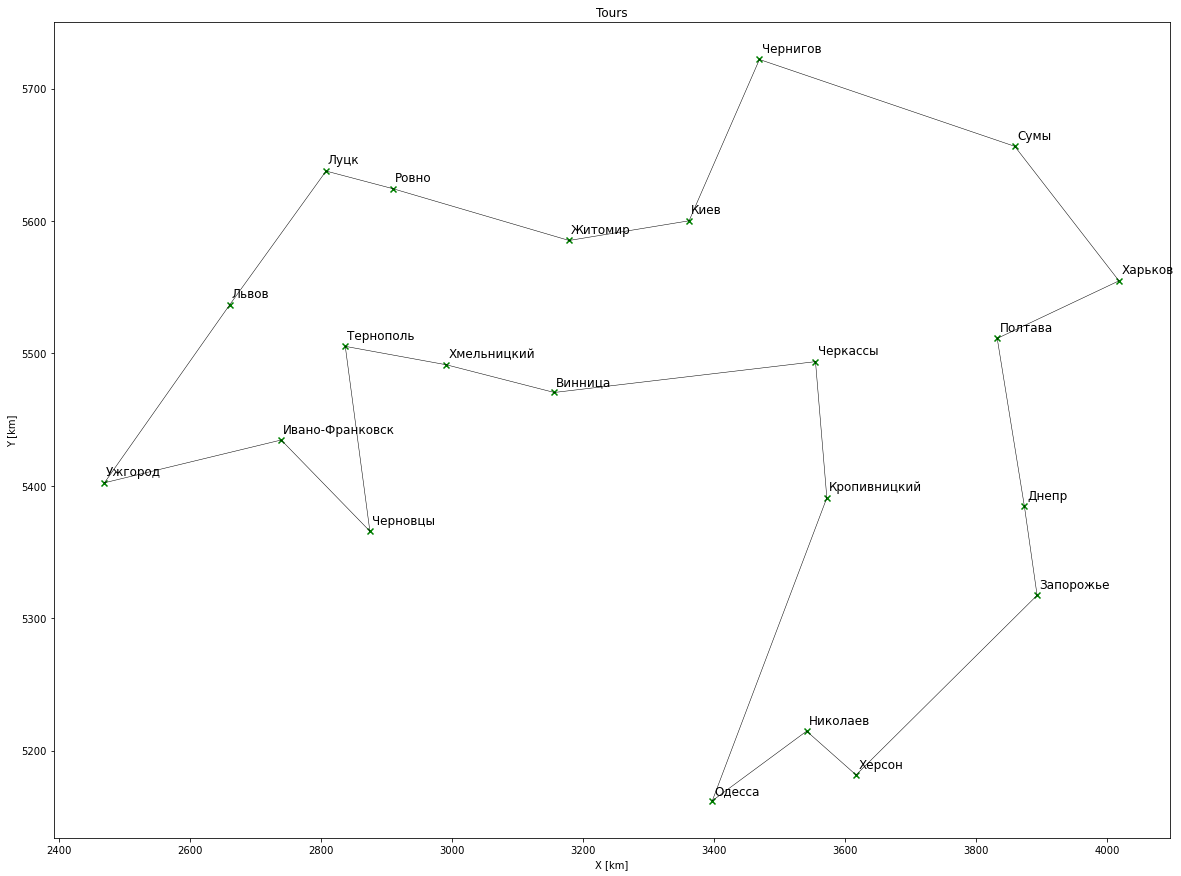

In [8]:
# Visualize the shortest route
import pandas as pd
# locations, geographical coordinates in degrees
# convert to radians
Pi = np.pi
#latitude = Pi/180*latitude
#longitude = Pi/180*longitude
# https://en.wikipedia.org/wiki/Spherical_coordinate_system
theta = longitude # polar angle
phi = latitude-Pi/2 # azimuthal angle
R = 40000/(2*Pi) # radius of Earth 
import math
#X = R*np.sin(theta)*np.cos(phi) # x-coordinates in km
#Y = R*np.sin(theta)*np.sin(phi) # y-coordinates in km
#Z = R*np.cos(theta) # z-coordinates in km
X = 40000/360*longitude
Y = 40000/360*latitude

#,'Николаев','Одесса','Полтава','Ровно','Севастополь','Симферополь','Сумы','Тернополь','Ужгород','Харьков','Херсон','Хмельницкий','Черкассы','Чернигов','Черновцы'
# 'Донецк','Луганск',

def plot_tours(cityNames, r):
    tours = [[r[i], r[i+1]] for i in range(N)]
    plt.figure(1, figsize=(20,15))
    for s, tour in enumerate(tours):
        plt.plot([ X[tour[0]], X[tour[1]] ], [ Y[tour[0]], Y[tour[1]] ], color = "black", linewidth=0.5) # line
        plt.scatter(X[tour[1]], Y[tour[1]], marker = 'x', color = 'g', label = cityNames[tour[1]]) # dot
        plt.text(X[tour[1]]*1.001, Y[tour[1]]*1.001, cityNames[tour[1]], fontsize=12)
    #plt.scatter(0,0, marker = "o", color = 'b', label = "factory")
    plt.xlabel("X [km]"), plt.ylabel("Y [km]"), plt.title("Tours") #, plt.legend(loc = 1)
    plt.show()

plot_tours(cityNames, r)

### Nearest-neighbour path
The rule that one first should go from the starting point to the closest point, then to the point closest to this, etc., in general does not yield the shortest route.

In [9]:
nn()

r_nn = [0, 18, 14, 4, 8, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 21, 15, 0]
d_nn = 4831.1


### s2f

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
2<->1; dc=-1064.6; d = 11648.4
3<->2; dc=-90.00000000000011; d = 11558.4
12<->3; dc=-284.4000000000001; d = 11274.0
1<->12; dc=-97.0; d = 11177.0
4<->1; dc=-647.0; d = 10530.0
7<->4; dc=-205.39999999999998; d = 10324.6
12<->7; dc=-39.0; d = 10285.6
6<->2; dc=-384.0; d = 9901.6
2<->7; dc=-52.59999999999991; d = 9849.0
5<->12; dc=-59.39999999999998; d = 9789.6
2<->5; dc=-229.0; d = 9560.6
18<->2; dc=-15.0; d = 9545.6
16<->18; dc=-6.0; d = 9539.6
5<->16; dc=-356.0; d = 9183.6
1<->5; dc=-341.0; d = 8842.6
16<->1; dc=-20.0; d = 8822.6
6<->16; dc=-232.0; d = 8590.6
11<->6; dc=-15.0; d = 8575.6
1<->11; dc=-81.0; d = 8494.6
6<->1; dc=-263.6; d = 8231.0
13<->6; dc=-134.0; d = 8097.0
5<->13; dc=-101.0; d = 7996.0
17<->5; dc=-358.0; d = 7638.0
10<->17; dc=-188.9000000000001; d = 7449.1
9<->10; dc=-1.099999999999909; d = 7448.0
1<->9; dc=-75.30000000000007; d = 7372.7
6<->1; dc=-143.60000000000002; 

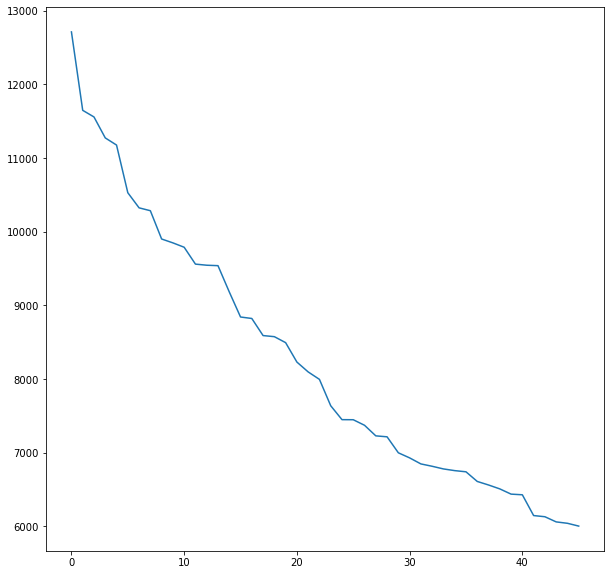

In [221]:
init(); dm_s2f=[d_min]; i_s2f=[0]; j_s2f=[0]; dc_s2f=[0];
while swap2first():
    dm_s2f.append(d_min)
    i_s2f.append(i_opt)
    j_s2f.append(j_opt)
    dc_s2f.append(dc_min)
d_s2f = d_min
r_s2f = r
print("dm_s2f =",dm_s2f)
print("d_s2f =",d_s2f)
print("r_s2f =",r)
print("i_s2f =",i_s2f)
print("j_s2f =",j_s2f)
print("dc_s2f =",dc_s2f)
if dm_s2f[-1] < dm_s2f[0]:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2f)

### s2b

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
3<->12; dc=-1883.0; d = 12713.0
1<->18; dc=-1337.0; d = 10830.0
11<->17; dc=-878.0; d = 9493.0
5<->21; dc=-699.0; d = 8615.0
6<->15; dc=-1083.0; d = 7916.0
9<->14; dc=-735.0; d = 6833.0
13<->1; dc=-583.6; d = 6098.0
4<->7; dc=-182.39999999999998; d = 5514.4
21<->8; dc=-255.0; d = 5332.0
16<->11; dc=-130.0; d = 5077.0
3<->9; dc=-115.89999999999998; d = 4947.0
1<->6; dc=-222.0; d = 4831.1
2<->14; dc=-24.0; d = 4609.1
17<->9; dc=-8.0; d = 4585.1
dm_s2b = [12713.0, 10830.0, 9493.0, 8615.0, 7916.0, 6833.0, 6098.0, 5514.4, 5332.0, 5077.0, 4947.0, 4831.1, 4609.1, 4585.1, 4577.1]
d_s2b = 4577.1
r_s2b = [0, 18, 14, 12, 7, 8, 15, 4, 21, 2, 10, 9, 17, 6, 3, 1, 11, 16, 13, 19, 20, 5, 0]
i_s2b = [0, 3, 1, 11, 5, 6, 9, 13, 4, 5, 16, 12, 13, 2, 11]
j_s2b = [0, 12, 18, 17, 21, 15, 14, 18, 7, 8, 17, 14, 15, 9, 12]
dc_s2b = [0, -1883.0, -1337.0, -878.0, -699.0, -1083.0, -735.0, -583.6, -182.39999999999998

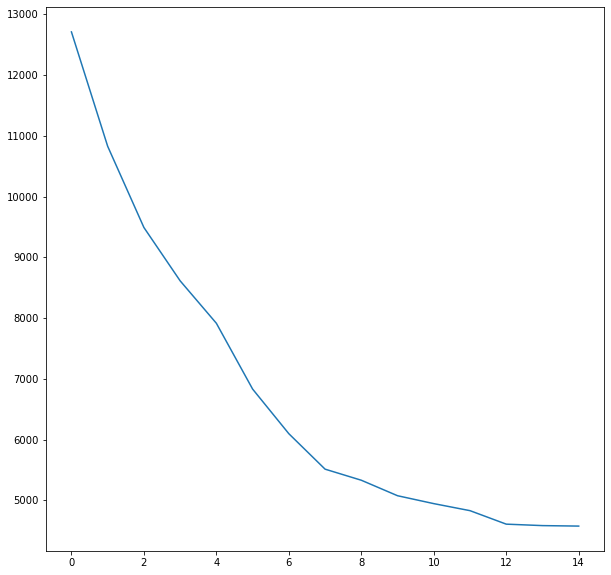

In [222]:
init(); dm_s2b=[d_min]; i_s2b=[0]; j_s2b=[0]; dc_s2b=[0];
while swap2best():
    dm_s2b.append(d_min)
    i_s2b.append(i_opt)
    j_s2b.append(j_opt)
    dc_s2b.append(dc_min)
d_s2b = d_min
r_s2b = r
print("dm_s2b =",dm_s2b)
print("d_s2b =",d_s2b)
print("r_s2b =",r)
print("i_s2b =",i_s2b)
print("j_s2b =",j_s2b)
print("dc_s2b =",dc_s2b)
if dm_s2b[-1] < dm_s2b[0]:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2b)

### s3f

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
1,2,3<->3,1,2; dc=-1154.6; d = 11558.4
6,12,16<->12,16,6; dc=-2228.4; d = 9330.0
5,15,18<->15,18,5; dc=-1166.0; d = 8164.0
9,5,21<->21,9,5; dc=-882.9000000000001; d = 7281.1
2,21,14<->21,14,2; dc=-467.0; d = 6814.1
10,18,6<->18,6,10; dc=-382.0; d = 6432.1
11,2,5<->5,11,2; dc=-471.0; d = 5961.1
12,7,8<->8,12,7; dc=-135.0; d = 5826.1
10,17,9<->9,10,17; dc=-3.1000000000000227; d = 5823.0
9,10,17<->17,9,10; dc=-25.899999999999977; d = 5797.1
16,6,20<->20,16,6; dc=-62.0; d = 5735.1
1,17,19<->19,1,17; dc=-159.5; d = 5575.6
3,11,16<->11,16,3; dc=-130.5999999999999; d = 5445.0
11,5,20<->5,20,11; dc=-91.0; d = 5354.0
11,13,16<->13,16,11; dc=-175.0; d = 5179.0
19,18,2<->18,2,19; dc=-351.0; d = 4828.0
5,14,2<->14,2,5; dc=-431.0; d = 4397.0
14,18,21<->18,21,14; dc=-61.0; d = 4336.0
9,10,17<->17,9,10; dc=-57.89999999999998; d = 4278.1
14,4,8<->4,8,14; dc=-27.0; d = 4251.1
dm_s3f = [12713.0, 11558.4, 

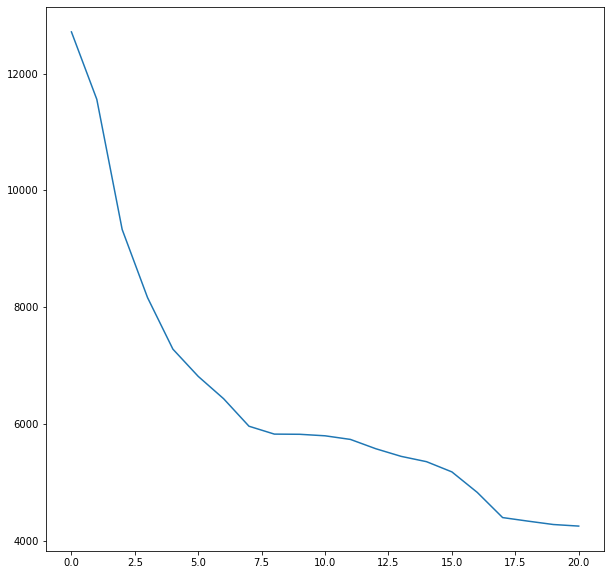

In [223]:
init(); dm_s3f=[d_min]; i_s3f=[0]; j_s3f=[0]; k_s3f=[0]; dc_s3f=[0];
while swap3first():
    dm_s3f.append(d_min)
    i_s3f.append(i_opt)
    j_s3f.append(j_opt)
    k_s3f.append(k_opt)
    dc_s3f.append(dc_min)
d_s3f = d_min
r_s3f = r
print("dm_s3f =",dm_s3f)
print("d_s3f =",d_s3f)
print("r_s3f =",r)
print("i_s3f =",i_s3f)
print("j_s3f =",j_s3f)
print("k_s3f =",k_s3f)
print("dc_s3f =",dc_s3f)
if dm_s3f[-1] < dm_s3f[0]:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3f)

### s3b

d = 12713.0 ; r = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 0]
3,12,16<->12,16,3; dc=-2509.0; d = 10204.0
1,10,18<->18,1,10; dc=-1540.0; d = 8664.0
12,6,15<->15,12,6; dc=-807.4000000000001; d = 7856.6
5,14,19<->14,19,5; dc=-1588.0; d = 6268.6
2,8,21<->8,21,2; dc=-838.0; d = 5430.6
9,3,17<->3,17,9; dc=-396.5; d = 5034.1
14,12,21<->21,14,12; dc=-200.0; d = 4834.1
3,11,19<->19,3,11; dc=-99.0; d = 4735.1
dm_s3b = [12713.0, 10204.0, 8664.0, 7856.6, 6268.6, 5430.6, 5034.1, 4834.1, 4735.1]
d_s3b = 4735.1
r_s3b = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 1, 3, 16, 13, 11, 6, 17, 9, 10, 5, 20, 2, 0]
i_s3b = [0, 3, 1, 3, 5, 2, 9, 5, 9]
j_s3b = [0, 12, 10, 6, 14, 8, 16, 6, 11]
k_s3b = [0, 16, 18, 15, 19, 21, 17, 8, 14]
dc_s3b = [0, -2509.0, -1540.0, -807.4000000000001, -1588.0, -838.0, -396.5, -200.0, -99.0]
Verification is successful:
r = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 1, 3, 16, 13, 11, 6, 17, 9, 10, 5, 20, 2, 0]
Distance = 4735.1


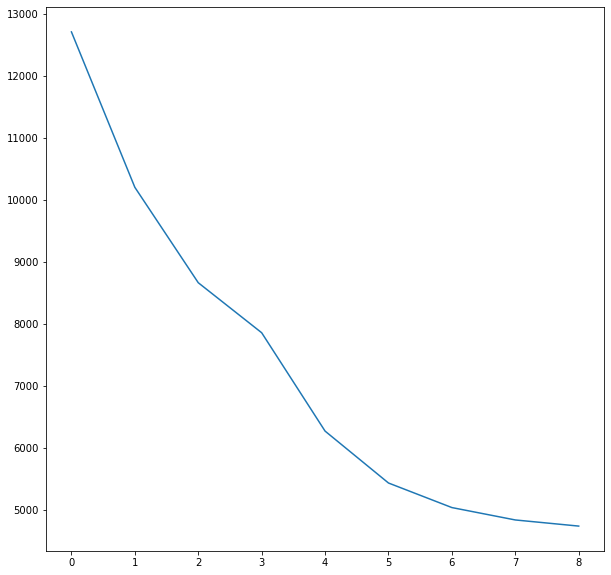

In [224]:
init(); dm_s3b=[d_min]; i_s3b=[0]; j_s3b=[0]; k_s3b=[0]; dc_s3b=[0];
while swap3best():
    dm_s3b.append(d_min)
    i_s3b.append(i_opt)
    j_s3b.append(j_opt)
    k_s3b.append(k_opt)
    dc_s3b.append(dc_min)
d_s3b = d_min
r_s3b = r
print("dm_s3b =",dm_s3b)
print("d_s3b =",d_s3b)
print("r_s3b =",r)
print("i_s3b =",i_s3b)
print("j_s3b =",j_s3b)
print("k_s3b =",k_s3b)
print("dc_s3b =",dc_s3b)
if dm_s3b[-1] < dm_s3b[0]:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3b)

### NN + s2f

21<->14; dc=-31.0; d = 4800.1
15<->18; dc=-23.0; d = 4777.1
21<->15; dc=-139.0; d = 4638.1
4<->15; dc=-136.0; d = 4502.1
16<->11; dc=-43.0; d = 4459.1
19<->6; dc=-89.0; d = 4370.1
17<->9; dc=-8.0; d = 4362.1
dm_nn_s2f = [4831.1, 4800.1, 4777.1, 4638.1, 4502.1, 4459.1, 4370.1, 4362.1]
d_nn_s2f = 4362.1
r_nn_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f = [0, 2, 1, 1, 2, 11, 15, 17]
j_nn_s2f = [0, 20, 21, 2, 3, 12, 16, 18]
dc_nn_s2f = [0, -31.0, -23.0, -139.0, -136.0, -43.0, -89.0, -8.0]
Verification is successful:
r = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
Distance = 4362.1


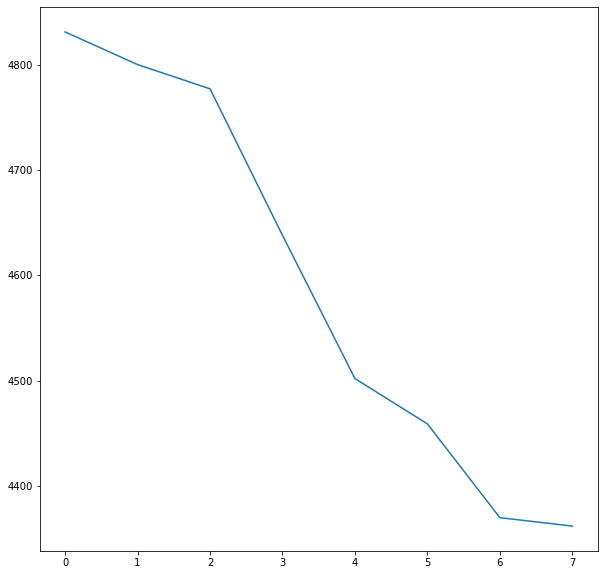

In [225]:
r = r_nn[:]; d_min=d_nn; dm_nn_s2f=[d_nn]; i_nn_s2f=[0]; j_nn_s2f=[0]; dc_nn_s2f=[0];
while swap2first():
    dm_nn_s2f.append(d_min)
    i_nn_s2f.append(i_opt)
    j_nn_s2f.append(j_opt)
    dc_nn_s2f.append(dc_min)
d_nn_s2f = d_min
r_nn_s2f = r
print("dm_nn_s2f =",dm_nn_s2f)
print("d_nn_s2f =",d_nn_s2f)
print("r_nn_s2f =",r)
print("i_nn_s2f =",i_nn_s2f)
print("j_nn_s2f =",j_nn_s2f)
print("dc_nn_s2f =",dc_nn_s2f)
if d_nn_s2f < d_nn:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2f)

### NN + s2b

4<->15; dc=-131.0; d = 4831.1
6<->19; dc=-89.0; d = 4700.1
11<->16; dc=-43.0; d = 4611.1
14<->4; dc=-31.0; d = 4568.1
18<->21; dc=-122.0; d = 4537.1
18<->14; dc=-45.0; d = 4415.1
9<->17; dc=-8.0; d = 4370.1
dm_nn_s2b = [4831.1, 4700.1, 4611.1, 4568.1, 4537.1, 4415.1, 4370.1, 4362.1]
d_nn_s2b = 4362.1
r_nn_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b = [0, 3, 15, 11, 2, 1, 20, 17]
j_nn_s2b = [0, 21, 16, 12, 21, 20, 21, 18]
dc_nn_s2b = [0, -131.0, -89.0, -43.0, -31.0, -122.0, -45.0, -8.0]
Verification is successful:
r = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
Distance = 4362.1


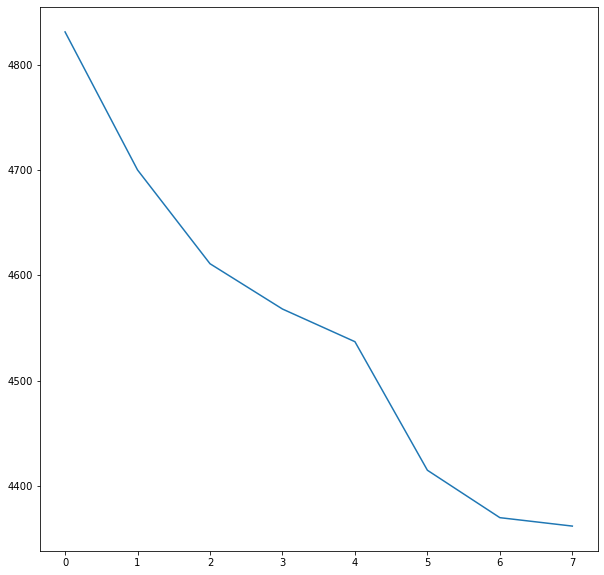

In [226]:
r = r_nn[:]; d_min=d_nn; dm_nn_s2b=[d_nn]; i_nn_s2b=[0]; j_nn_s2b=[0]; dc_nn_s2b=[0];
while swap2best():
    dm_nn_s2b.append(d_min)
    i_nn_s2b.append(i_opt)
    j_nn_s2b.append(j_opt)
    dc_nn_s2b.append(dc_min)
d_nn_s2b = d_min
r_nn_s2b = r
print("dm_nn_s2b =",dm_nn_s2b)
print("d_nn_s2b =",d_nn_s2b)
print("r_nn_s2b =",r)
print("i_nn_s2b =",i_nn_s2b)
print("j_nn_s2b =",j_nn_s2b)
print("dc_nn_s2b =",dc_nn_s2b)
if d_nn_s2b < d_nn:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2b)

### NN + s3f

18,14,15<->14,15,18; dc=-163.0; d = 4668.1
15,4,8<->4,8,15; dc=-1.0; d = 4667.1
14,21,18<->21,18,14; dc=-35.0; d = 4632.1
dm_nn_s3f = [4831.1, 4668.1, 4667.1, 4632.1]
d_nn_s3f = 4632.1
r_nn_s3f = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
i_nn_s3f = [0, 1, 2, 1]
j_nn_s3f = [0, 2, 3, 20]
k_nn_s3f = [0, 21, 4, 21]
dc_nn_s3f = [0, -163.0, -1.0, -35.0]
Verification is successful:
r = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
Distance = 4632.1


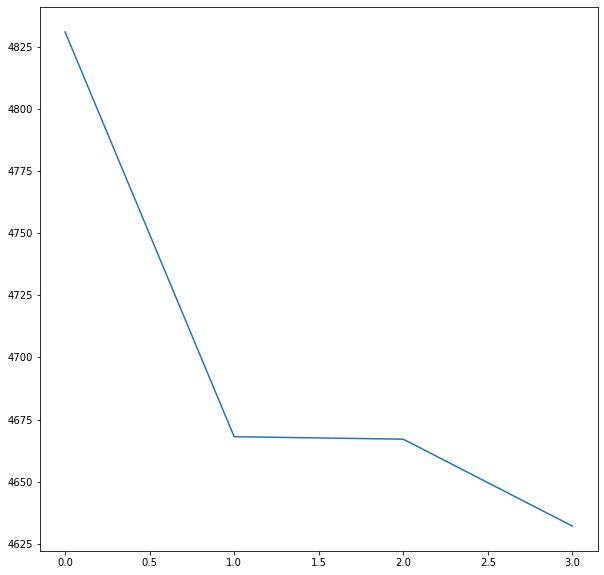

In [227]:
r = r_nn[:]; d_min=d_nn; dm_nn_s3f=[d_nn]; i_nn_s3f=[0]; j_nn_s3f=[0]; k_nn_s3f=[0]; dc_nn_s3f=[0];
while swap3first():
    dm_nn_s3f.append(d_min)
    i_nn_s3f.append(i_opt)
    j_nn_s3f.append(j_opt)
    k_nn_s3f.append(k_opt)
    dc_nn_s3f.append(dc_min)
d_nn_s3f = d_min
r_nn_s3f = r
print("dm_nn_s3f =",dm_nn_s3f)
print("d_nn_s3f =",d_nn_s3f)
print("r_nn_s3f =",r)
print("i_nn_s3f =",i_nn_s3f)
print("j_nn_s3f =",j_nn_s3f)
print("k_nn_s3f =",k_nn_s3f)
print("dc_nn_s3f =",dc_nn_s3f)
if d_nn_s3f < d_nn:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3f)

### NN + s3b

18,14,15<->14,15,18; dc=-163.0; d = 4668.1
15,4,8<->4,8,15; dc=-1.0; d = 4667.1
14,21,18<->21,18,14; dc=-35.0; d = 4632.1
dm_nn_s3b = [4831.1, 4668.1, 4667.1, 4632.1]
d_nn_s3b = 4632.1
r_nn_s3b = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
i_nn_s3b = [0, 1, 2, 1]
j_nn_s3b = [0, 2, 3, 20]
k_nn_s3b = [0, 21, 4, 21]
dc_nn_s3b = [0, -163.0, -1.0, -35.0]
Verification is successful:
r = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
Distance = 4632.1


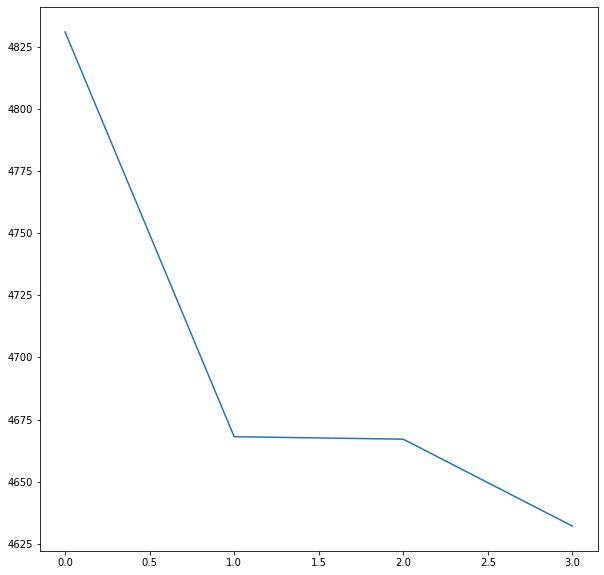

In [228]:
r = r_nn[:]; d_min=d_nn; dm_nn_s3b=[d_nn]; i_nn_s3b=[0]; j_nn_s3b=[0]; k_nn_s3b=[0]; dc_nn_s3b=[0];
while swap3best():
    dm_nn_s3b.append(d_min)
    i_nn_s3b.append(i_opt)
    j_nn_s3b.append(j_opt)
    k_nn_s3b.append(k_opt)
    dc_nn_s3b.append(dc_min)
d_nn_s3b = d_min
r_nn_s3b = r
print("dm_nn_s3b =",dm_nn_s3b)
print("d_nn_s3b =",d_nn_s3b)
print("r_nn_s3b =",r)
print("i_nn_s3b =",i_nn_s3b)
print("j_nn_s3b =",j_nn_s3b)
print("k_nn_s3b =",k_nn_s3b)
print("dc_nn_s3b =",dc_nn_s3b)
if d_nn_s3b < d_nn:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3b)

### s2f + s3f

8,14,18<->14,18,8; dc=-82.0; d = 5922.099999999999
12,2,19<->19,12,2; dc=-48.59999999999991; d = 5873.5
7,12,5<->5,7,12; dc=-98.40000000000009; d = 5775.1
14,7,20<->20,14,7; dc=-302.0; d = 5473.1
19,18,2<->2,19,18; dc=-220.0; d = 5253.1
6,2,20<->2,20,6; dc=-143.0; d = 5110.1
14,12,7<->12,7,14; dc=-61.0; d = 5049.1
19,17,1<->17,1,19; dc=-58.09999999999991; d = 4991.0
17,10,9<->10,9,17; dc=-57.89999999999998; d = 4933.1
2,6,19<->19,2,6; dc=-62.0; d = 4871.1
dm_s2f_s3f = [6004.099999999999, 5922.099999999999, 5873.5, 5775.1, 5473.1, 5253.1, 5110.1, 5049.1, 4991.0, 4933.1, 4871.1]
d_s2f_s3f = 4871.1
r_s2f_s3f = [0, 19, 11, 16, 13, 20, 5, 2, 10, 9, 17, 1, 3, 6, 21, 4, 15, 8, 12, 7, 14, 18, 0]
i_s2f_s3f = [0, 7, 5, 6, 7, 5, 1, 18, 8, 8, 1]
j_s2f_s3f = [0, 8, 18, 18, 18, 8, 5, 19, 11, 9, 7]
k_s2f_s3f = [0, 17, 21, 19, 20, 21, 7, 20, 13, 10, 13]
dc_s2f_s3f = [0, -82.0, -48.59999999999991, -98.40000000000009, -302.0, -220.0, -143.0, -61.0, -58.09999999999991, -57.89999999999998, -62.0]
Verifica

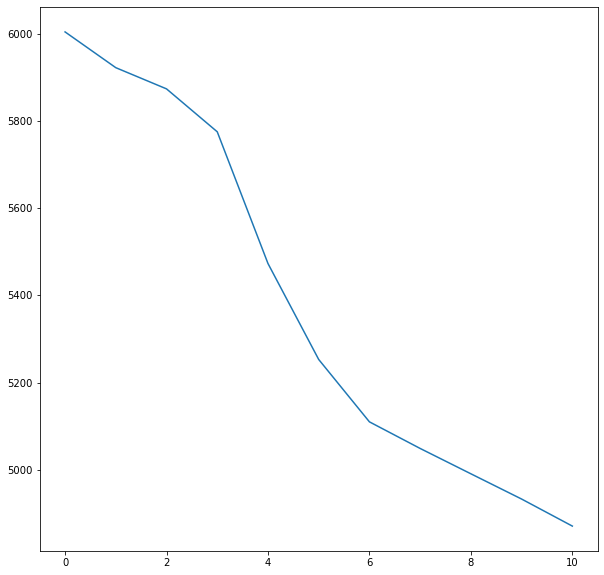

In [229]:
r = r_s2f[:]; d_min=d_s2f; dm_s2f_s3f=[d_s2f]; i_s2f_s3f=[0]; j_s2f_s3f=[0]; k_s2f_s3f=[0]; dc_s2f_s3f=[0];
while swap3first():
    dm_s2f_s3f.append(d_min)
    i_s2f_s3f.append(i_opt)
    j_s2f_s3f.append(j_opt)
    k_s2f_s3f.append(k_opt)
    dc_s2f_s3f.append(dc_min)
d_s2f_s3f = d_min
r_s2f_s3f = r
print("dm_s2f_s3f =",dm_s2f_s3f)
print("d_s2f_s3f =",d_s2f_s3f)
print("r_s2f_s3f =",r)
print("i_s2f_s3f =",i_s2f_s3f)
print("j_s2f_s3f =",j_s2f_s3f)
print("k_s2f_s3f =",k_s2f_s3f)
print("dc_s2f_s3f =",dc_s2f_s3f)
if d_s2f_s3f < d_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2f_s3f)

### s2f + s3b

8,14,18<->14,18,8; dc=-82.0; d = 5922.099999999999
12,2,19<->19,12,2; dc=-48.59999999999991; d = 5873.5
7,12,5<->5,7,12; dc=-98.40000000000009; d = 5775.1
14,7,20<->20,14,7; dc=-302.0; d = 5473.1
6,18,2<->2,6,18; dc=-255.0; d = 5218.1
19,5,20<->5,20,19; dc=-150.0; d = 5068.1
11,13,5<->5,11,13; dc=-108.0; d = 4960.1
16,13,20<->20,16,13; dc=-168.0; d = 4792.1
11,16,13<->13,11,16; dc=-62.0; d = 4730.1
14,12,7<->12,7,14; dc=-61.0; d = 4669.1
dm_s2f_s3b = [6004.099999999999, 5922.099999999999, 5873.5, 5775.1, 5473.1, 5218.1, 5068.1, 4960.1, 4792.1, 4730.1, 4669.1]
d_s2f_s3b = 4669.1
r_s2f_s3b = [0, 2, 5, 20, 13, 11, 16, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 12, 7, 14, 18, 0]
i_s2f_s3b = [0, 7, 5, 6, 7, 1, 5, 2, 3, 4, 18]
j_s2f_s3b = [0, 8, 18, 18, 18, 8, 6, 4, 5, 5, 19]
k_s2f_s3b = [0, 17, 21, 19, 20, 21, 7, 5, 6, 6, 20]
dc_s2f_s3b = [0, -82.0, -48.59999999999991, -98.40000000000009, -302.0, -255.0, -150.0, -108.0, -168.0, -62.0, -61.0]
Verification is successful:
r = [0, 2, 5, 20, 13, 11, 

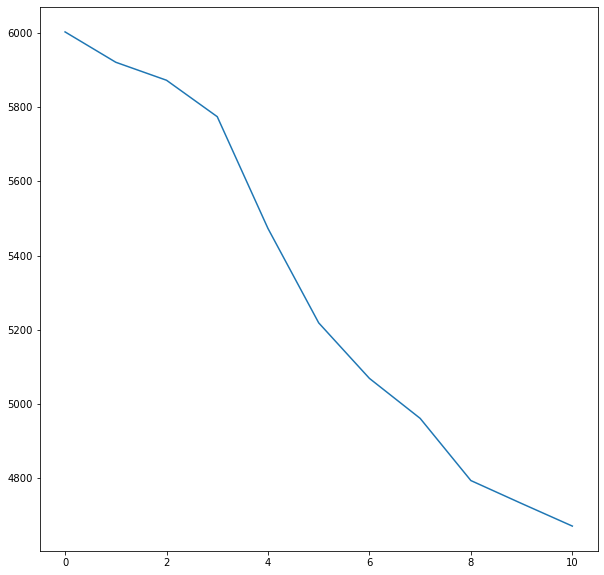

In [230]:
r = r_s2f[:]; d_min=d_s2f; dm_s2f_s3b=[d_s2f]; i_s2f_s3b=[0]; j_s2f_s3b=[0]; k_s2f_s3b=[0]; dc_s2f_s3b=[0];
while swap3best():
    dm_s2f_s3b.append(d_min)
    i_s2f_s3b.append(i_opt);
    j_s2f_s3b.append(j_opt);
    k_s2f_s3b.append(k_opt);
    dc_s2f_s3b.append(dc_min)
d_s2f_s3b = d_min
r_s2f_s3b = r
print("dm_s2f_s3b =",dm_s2f_s3b)
print("d_s2f_s3b =",d_s2f_s3b)
print("r_s2f_s3b =",r)
print("i_s2f_s3b =",i_s2f_s3b)
print("j_s2f_s3b =",j_s2f_s3b)
print("k_s2f_s3b =",k_s2f_s3b)
print("dc_s2f_s3b =",dc_s2f_s3b)
if d_s2f_s3b < d_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2f_s3b)

### s2b + s3f

19,20,5<->20,5,19; dc=-66.0; d = 4511.1
2,6,19<->6,19,2; dc=-73.0; d = 4438.1
6,10,17<->10,17,6; dc=-198.0; d = 4240.1
dm_s2b_s3f = [4577.1, 4511.1, 4438.1, 4240.1]
d_s2b_s3f = 4240.1
r_s2b_s3f = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3f = [0, 19, 9, 9]
j_s2b_s3f = [0, 20, 13, 10]
k_s2b_s3f = [0, 21, 21, 12]
dc_s2b_s3f = [0, -66.0, -73.0, -198.0]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
Distance = 4240.1


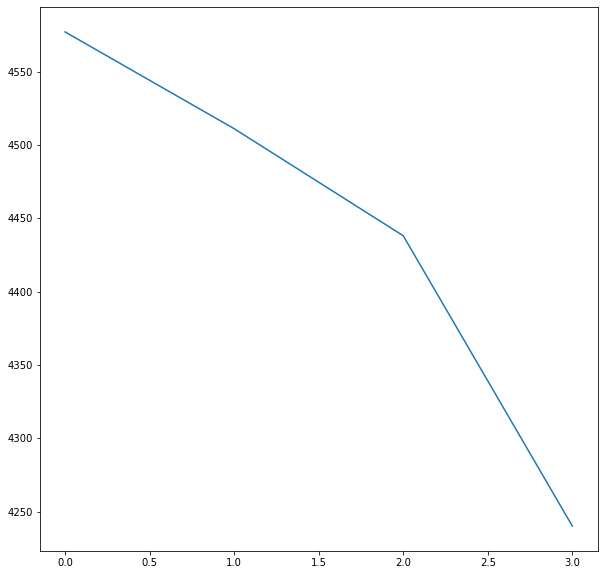

In [231]:
r = r_s2b[:]; d_min=d_s2b; dm_s2b_s3f=[d_s2b]; i_s2b_s3f=[0]; j_s2b_s3f=[0]; k_s2b_s3f=[0]; dc_s2b_s3f=[0];
while swap3first():
    dm_s2b_s3f.append(d_min)
    i_s2b_s3f.append(i_opt)
    j_s2b_s3f.append(j_opt)
    k_s2b_s3f.append(k_opt)
    dc_s2b_s3f.append(dc_min)
d_s2b_s3f = d_min
r_s2b_s3f = r
print("dm_s2b_s3f =",dm_s2b_s3f)
print("d_s2b_s3f =",d_s2b_s3f)
print("r_s2b_s3f =",r)
print("i_s2b_s3f =",i_s2b_s3f)
print("j_s2b_s3f =",j_s2b_s3f)
print("k_s2b_s3f =",k_s2b_s3f)
print("dc_s2b_s3f =",dc_s2b_s3f)
if d_s2b_s3f < d_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2b_s3f)

### s2b + s3b

19,20,5<->20,5,19; dc=-66.0; d = 4511.1
2,6,19<->6,19,2; dc=-73.0; d = 4438.1
6,10,17<->10,17,6; dc=-198.0; d = 4240.1
dm_s2b_s3b = [4577.1, 4511.1, 4438.1, 4240.1]
d_s2b_s3b = 4240.1
r_s2b_s3b = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3b = [0, 19, 9, 9]
j_s2b_s3b = [0, 20, 13, 10]
k_s2b_s3b = [0, 21, 21, 12]
dc_s2b_s3b = [0, -66.0, -73.0, -198.0]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
Distance = 4240.1


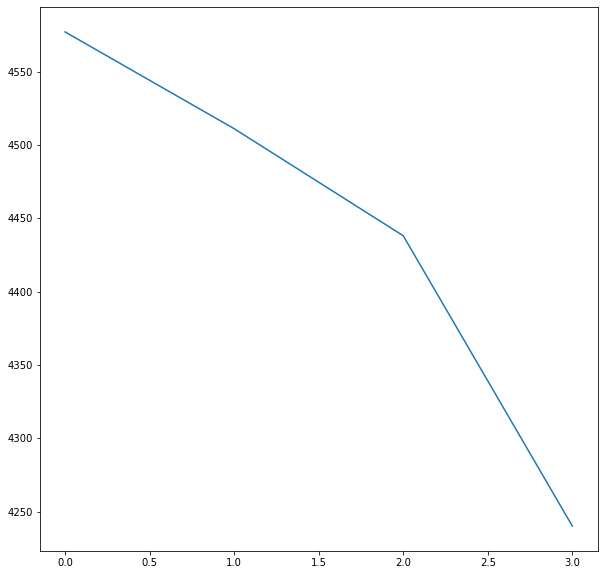

In [232]:
r = r_s2b[:]; d_min=d_s2b; dm_s2b_s3b=[d_s2b]; i_s2b_s3b=[0]; j_s2b_s3b=[0]; k_s2b_s3b=[0]; dc_s2b_s3b=[0];
while swap3best():
    dm_s2b_s3b.append(d_min)
    i_s2b_s3b.append(i_opt);
    j_s2b_s3b.append(j_opt);
    k_s2b_s3b.append(k_opt);
    dc_s2b_s3b.append(dc_min)
d_s2b_s3b = d_min
r_s2b_s3b = r
print("dm_s2b_s3b =",dm_s2b_s3b)
print("d_s2b_s3b =",d_s2b_s3b)
print("r_s2b_s3b =",r)
print("i_s2b_s3b =",i_s2b_s3b)
print("j_s2b_s3b =",j_s2b_s3b)
print("k_s2b_s3b =",k_s2b_s3b)
print("dc_s2b_s3b =",dc_s2b_s3b)
if d_s2b_s3b < d_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2b_s3b)

### s3f + s2f

15<->8; dc=-57.0; d = 4194.1
7<->12; dc=-65.0; d = 4129.1
1<->3; dc=-115.0; d = 4014.1000000000004
dm_s3f_s2f = [4251.1, 4194.1, 4129.1, 4014.1000000000004]
d_s3f_s2f = 4014.1000000000004
r_s3f_s2f = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2f = [0, 4, 7, 15]
j_s3f_s2f = [0, 5, 8, 16]
dc_s3f_s2f = [0, -57.0, -65.0, -115.0]
Verification is successful:
r = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
Distance = 4014.1


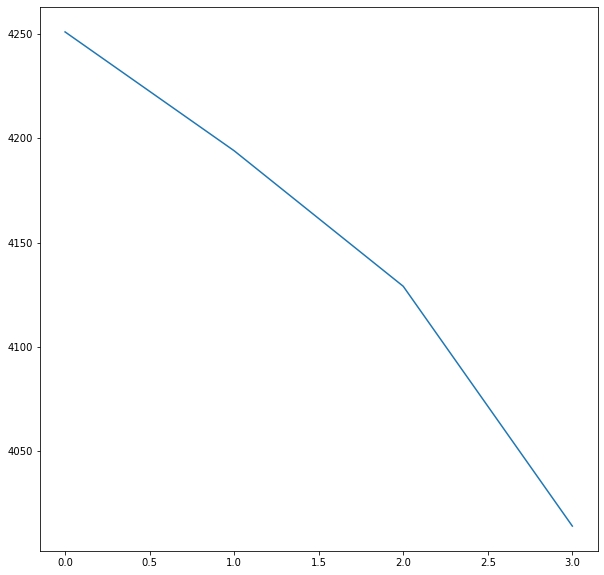

In [233]:
r = r_s3f[:]; d_min=d_s3f; dm_s3f_s2f=[d_s3f]; i_s3f_s2f=[0]; j_s3f_s2f=[0]; dc_s3f_s2f=[0];
while swap2first():
    dm_s3f_s2f.append(d_min)
    i_s3f_s2f.append(i_opt)
    j_s3f_s2f.append(j_opt)
    dc_s3f_s2f.append(dc_min)
d_s3f_s2f = d_min
r_s3f_s2f = r
print("dm_s3f_s2f =",dm_s3f_s2f)
print("d_s3f_s2f =",d_s3f_s2f)
print("r_s3f_s2f =",r)
print("i_s3f_s2f =",i_s3f_s2f)
print("j_s3f_s2f =",j_s3f_s2f)
print("dc_s3f_s2f =",dc_s3f_s2f)
if d_s3f_s2f < d_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3f_s2f)

### s3f + s2b

3<->1; dc=-115.0; d = 4251.1
12<->7; dc=-65.0; d = 4136.1
8<->15; dc=-57.0; d = 4071.1000000000004
dm_s3f_s2b = [4251.1, 4136.1, 4071.1000000000004, 4014.1000000000004]
d_s3f_s2b = 4014.1000000000004
r_s3f_s2b = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2b = [0, 15, 7, 4]
j_s3f_s2b = [0, 16, 8, 5]
dc_s3f_s2b = [0, -115.0, -65.0, -57.0]
Verification is successful:
r = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
Distance = 4014.1


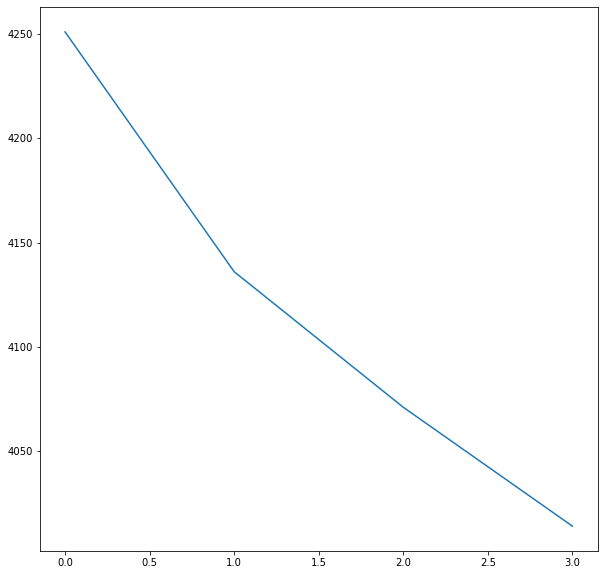

In [234]:
r = r_s3f[:]; d_min=d_s3f; dm_s3f_s2b=[d_s3f]; i_s3f_s2b=[0]; j_s3f_s2b=[0]; dc_s3f_s2b=[0];
while swap2best():
    dm_s3f_s2b.append(d_min)
    i_s3f_s2b.append(i_opt)
    j_s3f_s2b.append(j_opt)
    dc_s3f_s2b.append(dc_min)
d_s3f_s2b = d_min
r_s3f_s2b = r
print("dm_s3f_s2b =",dm_s3f_s2b)
print("d_s3f_s2b =",d_s3f_s2b)
print("r_s3f_s2b =",r)
print("i_s3f_s2b =",i_s3f_s2b)
print("j_s3f_s2b =",j_s3f_s2b)
print("dc_s3f_s2b =",dc_s3f_s2b)
if d_s3f_s2b < d_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3f_s2b)

### s3b + s2f

3<->1; dc=-16.0; d = 4719.1
20<->5; dc=-7.0; d = 4712.1
dm_s3b_s2f = [4735.1, 4719.1, 4712.1]
d_s3b_s2f = 4712.1
r_s3b_s2f = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2f = [0, 10, 19]
j_s3b_s2f = [0, 11, 20]
dc_s3b_s2f = [0, -16.0, -7.0]
Verification is successful:
r = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
Distance = 4712.1


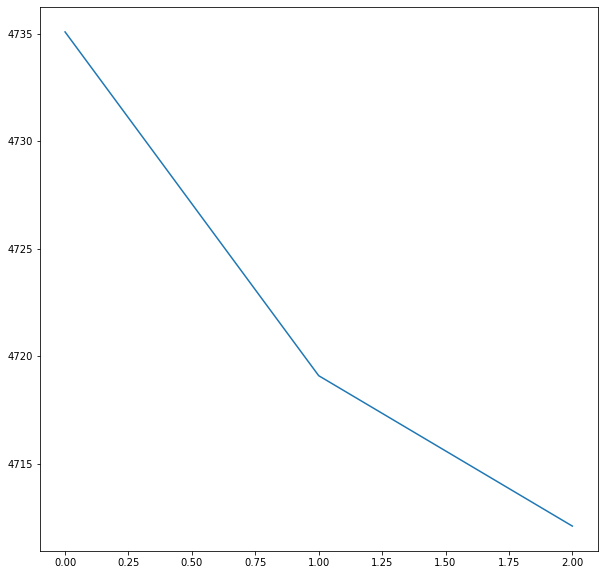

In [235]:
r = r_s3b[:]; d_min=d_s3b; dm_s3b_s2f=[d_s3b]; i_s3b_s2f=[0]; j_s3b_s2f=[0]; dc_s3b_s2f=[0];
while swap2first():
    dm_s3b_s2f.append(d_min)
    i_s3b_s2f.append(i_opt)
    j_s3b_s2f.append(j_opt)
    dc_s3b_s2f.append(dc_min)
d_s3b_s2f = d_min
r_s3b_s2f = r
print("dm_s3b_s2f =",dm_s3b_s2f)
print("d_s3b_s2f =",d_s3b_s2f)
print("r_s3b_s2f =",r)
print("i_s3b_s2f =",i_s3b_s2f)
print("j_s3b_s2f =",j_s3b_s2f)
print("dc_s3b_s2f =",dc_s3b_s2f)
if d_s3b_s2f < d_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3b_s2f)

### s3b + s2b

1<->3; dc=-16.0; d = 4735.1
5<->20; dc=-7.0; d = 4719.1
dm_s3b_s2b = [4735.1, 4719.1, 4712.1]
d_s3b_s2b = 4712.1
r_s3b_s2b = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2b = [0, 10, 19]
j_s3b_s2b = [0, 11, 20]
dc_s3b_s2b = [0, -16.0, -7.0]
Verification is successful:
r = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
Distance = 4712.1


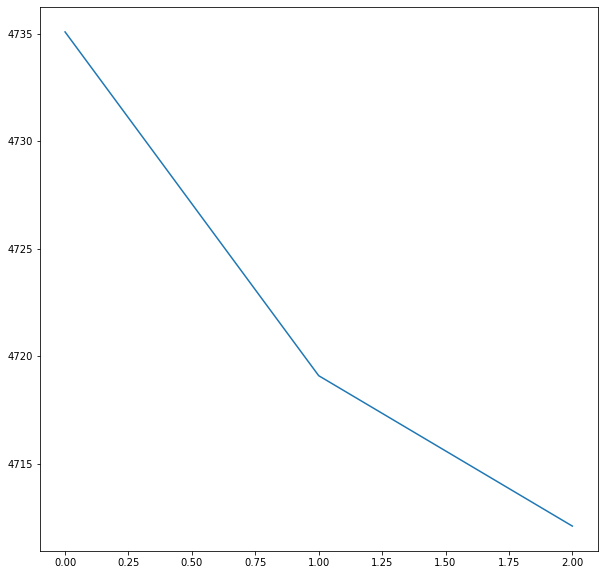

In [236]:
r = r_s3b[:]; d_min=d_s3b; dm_s3b_s2b=[d_s3b]; i_s3b_s2b=[0]; j_s3b_s2b=[0]; dc_s3b_s2b=[0];
while swap2best():
    dm_s3b_s2b.append(d_min)
    i_s3b_s2b.append(i_opt)
    j_s3b_s2b.append(j_opt)
    dc_s3b_s2b.append(dc_min)
d_s3b_s2b = d_min
r_s3b_s2b = r
print("dm_s3b_s2b =",dm_s3b_s2b)
print("d_s3b_s2b =",d_s3b_s2b)
print("r_s3b_s2b =",r)
print("i_s3b_s2b =",i_s3b_s2b)
print("j_s3b_s2b =",j_s3b_s2b)
print("dc_s3b_s2b =",dc_s3b_s2b)
if d_s3b_s2b < d_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3b_s2b)

### NN + s2f + s3f

In [237]:
r = r_nn_s2f[:]; d_min=d_nn_s2f; dm_nn_s2f_s3f=[d_nn_s2f]; i_nn_s2f_s3f=[0]; j_nn_s2f_s3f=[0]; dc_nn_s2f_s3f=[0];
while swap3first():
    dm_nn_s2f_s3f.append(d_min)
    i_nn_s2f_s3f.append(i_opt)
    j_nn_s2f_s3f.append(j_opt)
    dc_nn_s2f_s3f.append(dc_min)
d_nn_s2f_s3f = d_min
r_nn_s2f_s3f = r
print("dm_nn_s2f_s3f =",dm_nn_s2f_s3f)
print("d_nn_s2f_s3f =",d_nn_s2f_s3f)
print("r_nn_s2f_s3f =",r)
print("i_nn_s2f_s3f =",i_nn_s2f_s3f)
print("j_nn_s2f_s3f =",j_nn_s2f_s3f)
print("dc_nn_s2f_s3f =",dc_nn_s2f_s3f)
if d_nn_s2f_s3f < d_nn_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2f_s3f)

dm_nn_s2f_s3f = [4362.1]
d_nn_s2f_s3f = 4362.1
r_nn_s2f_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3f = [0]
j_nn_s2f_s3f = [0]
dc_nn_s2f_s3f = [0]


### NN + s2f + s3b

In [238]:
r = r_nn_s2f[:]; d_min=d_nn_s2f; dm_nn_s2f_s3b=[d_nn_s2f]; i_nn_s2f_s3b=[0]; j_nn_s2f_s3b=[0]; dc_nn_s2f_s3b=[0];
while swap3best():
    dm_nn_s2f_s3b.append(d_min)
    i_nn_s2f_s3b.append(i_opt)
    j_nn_s2f_s3b.append(j_opt)
    dc_nn_s2f_s3b.append(dc_min)
d_nn_s2f_s3b = d_min
r_nn_s2f_s3b = r
print("dm_nn_s2f_s3b =",dm_nn_s2f_s3b)
print("d_nn_s2f_s3b =",d_nn_s2f_s3b)
print("r_nn_s2f_s3b =",r)
print("i_nn_s2f_s3b =",i_nn_s2f_s3b)
print("j_nn_s2f_s3b =",j_nn_s2f_s3b)
print("dc_nn_s2f_s3b =",dc_nn_s2f_s3b)
if d_nn_s2f_s3b < d_nn_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2f_s3b)

dm_nn_s2f_s3b = [4362.1]
d_nn_s2f_s3b = 4362.1
r_nn_s2f_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3b = [0]
j_nn_s2f_s3b = [0]
dc_nn_s2f_s3b = [0]


### NN + s2b + s3f

In [239]:
r = r_nn_s2b[:]; d_min=d_nn_s2b; dm_nn_s2b_s3f=[d_nn_s2b]; i_nn_s2b_s3f=[0]; j_nn_s2b_s3f=[0]; dc_nn_s2b_s3f=[0];
while swap3first():
    dm_nn_s2b_s3f.append(d_min)
    i_nn_s2b_s3f.append(i_opt)
    j_nn_s2b_s3f.append(j_opt)
    dc_nn_s2b_s3f.append(dc_min)
d_nn_s2b_s3f = d_min
r_nn_s2b_s3f = r
print("dm_nn_s2b_s3f =",dm_nn_s2b_s3f)
print("d_nn_s2b_s3f =",d_nn_s2b_s3f)
print("r_nn_s2b_s3f =",r)
print("i_nn_s2b_s3f =",i_nn_s2b_s3f)
print("j_nn_s2b_s3f =",j_nn_s2b_s3f)
print("dc_nn_s2b_s3f =",dc_nn_s2b_s3f)
if d_nn_s2b_s3f < d_nn_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2b_s3f)

dm_nn_s2b_s3f = [4362.1]
d_nn_s2b_s3f = 4362.1
r_nn_s2b_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3f = [0]
j_nn_s2b_s3f = [0]
dc_nn_s2b_s3f = [0]


### NN + s2b + s3b

In [240]:
r = r_nn_s2b[:]; d_min=d_nn_s2b; dm_nn_s2b_s3b=[d_nn_s2b]; i_nn_s2b_s3b=[0]; j_nn_s2b_s3b=[0]; dc_nn_s2b_s3b=[0];
while swap3best():
    dm_nn_s2b_s3b.append(d_min)
    i_nn_s2b_s3b.append(i_opt)
    j_nn_s2b_s3b.append(j_opt)
    dc_nn_s2b_s3b.append(dc_min)
d_nn_s2b_s3b = d_min
r_nn_s2b_s3b = r
print("dm_nn_s2b_s3b =",dm_nn_s2b_s3b)
print("d_nn_s2b_s3b =",d_nn_s2b_s3b)
print("r_nn_s2b_s3b =",r)
print("i_nn_s2b_s3b =",i_nn_s2b_s3b)
print("j_nn_s2b_s3b =",j_nn_s2b_s3b)
print("dc_nn_s2b_s3b =",dc_nn_s2b_s3b)
if d_nn_s2b_s3b < d_nn_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2b_s3b)

dm_nn_s2b_s3b = [4362.1]
d_nn_s2b_s3b = 4362.1
r_nn_s2b_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3b = [0]
j_nn_s2b_s3b = [0]
dc_nn_s2b_s3b = [0]


### NN + s3f + s2f

15<->8; dc=-85.0; d = 4547.1
16<->11; dc=-43.0; d = 4504.1
19<->6; dc=-89.0; d = 4415.1
17<->9; dc=-8.0; d = 4407.1
14<->18; dc=-45.0; d = 4362.1
dm_nn_s3f_s2f = [4632.1, 4547.1, 4504.1, 4415.1, 4407.1, 4362.1]
d_nn_s3f_s2f = 4362.1
r_nn_s3f_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2f = [0, 3, 11, 15, 17, 20]
j_nn_s3f_s2f = [0, 4, 12, 16, 18, 21]
dc_nn_s3f_s2f = [0, -85.0, -43.0, -89.0, -8.0, -45.0]
Verification is successful:
r = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
Distance = 4362.1


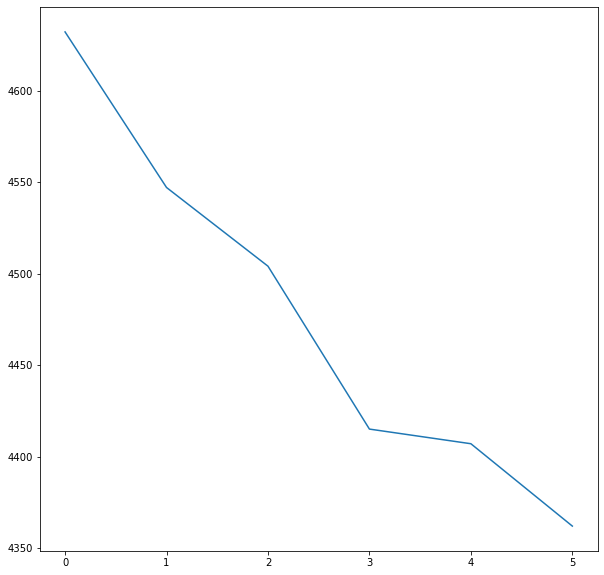

In [241]:
r = r_nn_s3f[:]; d_min=d_nn_s3f; dm_nn_s3f_s2f=[d_nn_s3f]; i_nn_s3f_s2f=[0]; j_nn_s3f_s2f=[0]; dc_nn_s3f_s2f=[0];
while swap2first():
    dm_nn_s3f_s2f.append(d_min)
    i_nn_s3f_s2f.append(i_opt)
    j_nn_s3f_s2f.append(j_opt)
    dc_nn_s3f_s2f.append(dc_min)
d_nn_s3f_s2f = d_min
r_nn_s3f_s2f = r
print("dm_nn_s3f_s2f =",dm_nn_s3f_s2f)
print("d_nn_s3f_s2f =",d_nn_s3f_s2f)
print("r_nn_s3f_s2f =",r)
print("i_nn_s3f_s2f =",i_nn_s3f_s2f)
print("j_nn_s3f_s2f =",j_nn_s3f_s2f)
print("dc_nn_s3f_s2f =",dc_nn_s3f_s2f)
if d_nn_s3f_s2f < d_nn_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3f_s2f)

### NN + s3f + s2b

6<->19; dc=-89.0; d = 4632.1
8<->15; dc=-85.0; d = 4543.1
18<->14; dc=-45.0; d = 4458.1
11<->16; dc=-43.0; d = 4413.1
9<->17; dc=-8.0; d = 4370.1
dm_nn_s3f_s2b = [4632.1, 4543.1, 4458.1, 4413.1, 4370.1, 4362.1]
d_nn_s3f_s2b = 4362.1
r_nn_s3f_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2b = [0, 15, 3, 20, 11, 17]
j_nn_s3f_s2b = [0, 16, 4, 21, 12, 18]
dc_nn_s3f_s2b = [0, -89.0, -85.0, -45.0, -43.0, -8.0]
Verification is successful:
r = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
Distance = 4362.1


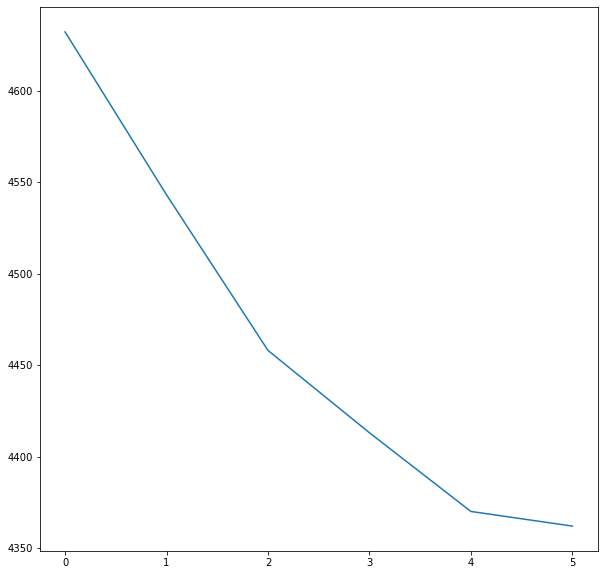

In [242]:
r = r_nn_s3f[:]; d_min=d_nn_s3f; dm_nn_s3f_s2b=[d_nn_s3f]; i_nn_s3f_s2b=[0]; j_nn_s3f_s2b=[0]; dc_nn_s3f_s2b=[0];
while swap2best():
    dm_nn_s3f_s2b.append(d_min)
    i_nn_s3f_s2b.append(i_opt)
    j_nn_s3f_s2b.append(j_opt)
    dc_nn_s3f_s2b.append(dc_min)
d_nn_s3f_s2b = d_min
r_nn_s3f_s2b = r
print("dm_nn_s3f_s2b =",dm_nn_s3f_s2b)
print("d_nn_s3f_s2b =",d_nn_s3f_s2b)
print("r_nn_s3f_s2b =",r)
print("i_nn_s3f_s2b =",i_nn_s3f_s2b)
print("j_nn_s3f_s2b =",j_nn_s3f_s2b)
print("dc_nn_s3f_s2b =",dc_nn_s3f_s2b)
if d_nn_s3f_s2b < d_nn_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3f_s2b)

### NN + s3b + s2f

15<->8; dc=-85.0; d = 4547.1
16<->11; dc=-43.0; d = 4504.1
19<->6; dc=-89.0; d = 4415.1
17<->9; dc=-8.0; d = 4407.1
14<->18; dc=-45.0; d = 4362.1
dm_nn_s3b_s2f = [4632.1, 4547.1, 4504.1, 4415.1, 4407.1, 4362.1]
d_nn_s3b_s2f = 4362.1
r_nn_s3b_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2f = [0, 3, 11, 15, 17, 20]
j_nn_s3b_s2f = [0, 4, 12, 16, 18, 21]
dc_nn_s3b_s2f = [0, -85.0, -43.0, -89.0, -8.0, -45.0]
Verification is successful:
r = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
Distance = 4362.1


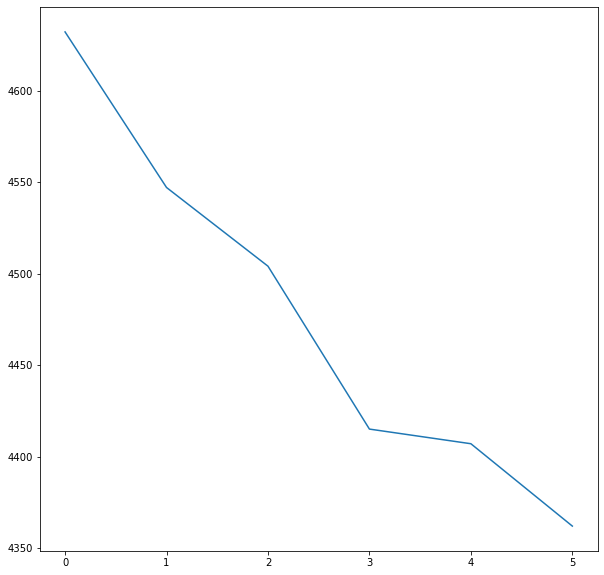

In [243]:
r = r_nn_s3b[:]; d_min=d_nn_s3b; dm_nn_s3b_s2f=[d_nn_s3b]; i_nn_s3b_s2f=[0]; j_nn_s3b_s2f=[0]; dc_nn_s3b_s2f=[0];
while swap2first():
    dm_nn_s3b_s2f.append(d_min)
    i_nn_s3b_s2f.append(i_opt)
    j_nn_s3b_s2f.append(j_opt)
    dc_nn_s3b_s2f.append(dc_min)
d_nn_s3b_s2f = d_min
r_nn_s3b_s2f = r
print("dm_nn_s3b_s2f =",dm_nn_s3b_s2f)
print("d_nn_s3b_s2f =",d_nn_s3b_s2f)
print("r_nn_s3b_s2f =",r)
print("i_nn_s3b_s2f =",i_nn_s3b_s2f)
print("j_nn_s3b_s2f =",j_nn_s3b_s2f)
print("dc_nn_s3b_s2f =",dc_nn_s3b_s2f)
if d_nn_s3b_s2f < d_nn_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3b_s2f)

### NN + s3b + s2b

6<->19; dc=-89.0; d = 4632.1
8<->15; dc=-85.0; d = 4543.1
18<->14; dc=-45.0; d = 4458.1
11<->16; dc=-43.0; d = 4413.1
9<->17; dc=-8.0; d = 4370.1
dm_nn_s3b_s2b = [4632.1, 4543.1, 4458.1, 4413.1, 4370.1, 4362.1]
d_nn_s3b_s2b = 4362.1
r_nn_s3b_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2b = [0, 15, 3, 20, 11, 17]
j_nn_s3b_s2b = [0, 16, 4, 21, 12, 18]
dc_nn_s3b_s2b = [0, -89.0, -85.0, -45.0, -43.0, -8.0]
Verification is successful:
r = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
Distance = 4362.1


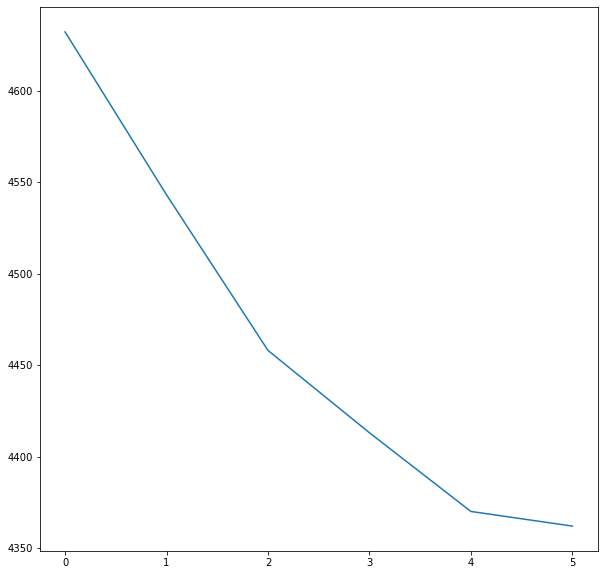

In [244]:
r = r_nn_s3b[:]; d_min=d_nn_s3b; dm_nn_s3b_s2b=[d_nn_s3b]; i_nn_s3b_s2b=[0]; j_nn_s3b_s2b=[0]; dc_nn_s3b_s2b=[0];
while swap2best():
    dm_nn_s3b_s2b.append(d_min)
    i_nn_s3b_s2b.append(i_opt)
    j_nn_s3b_s2b.append(j_opt)
    dc_nn_s3b_s2b.append(dc_min)
d_nn_s3b_s2b = d_min
r_nn_s3b_s2b = r
print("dm_nn_s3b_s2b =",dm_nn_s3b_s2b)
print("d_nn_s3b_s2b =",d_nn_s3b_s2b)
print("r_nn_s3b_s2b =",r)
print("i_nn_s3b_s2b =",i_nn_s3b_s2b)
print("j_nn_s3b_s2b =",j_nn_s3b_s2b)
print("dc_nn_s3b_s2b =",dc_nn_s3b_s2b)
if d_nn_s3b_s2b < d_nn_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3b_s2b)

### s2f + s3f + s2f

2<->19; dc=-2.0; d = 4869.1
3<->1; dc=-78.0; d = 4791.1
7<->12; dc=-39.0; d = 4752.1
dm_s2f_s3f_s2f = [4871.1, 4869.1, 4791.1, 4752.1]
d_s2f_s3f_s2f = 4752.1
r_s2f_s3f_s2f = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3f_s2f = [0, 1, 11, 18]
j_s2f_s3f_s2f = [0, 7, 12, 19]
dc_s2f_s3f_s2f = [0, -2.0, -78.0, -39.0]
Verification is successful:
r = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
Distance = 4752.1


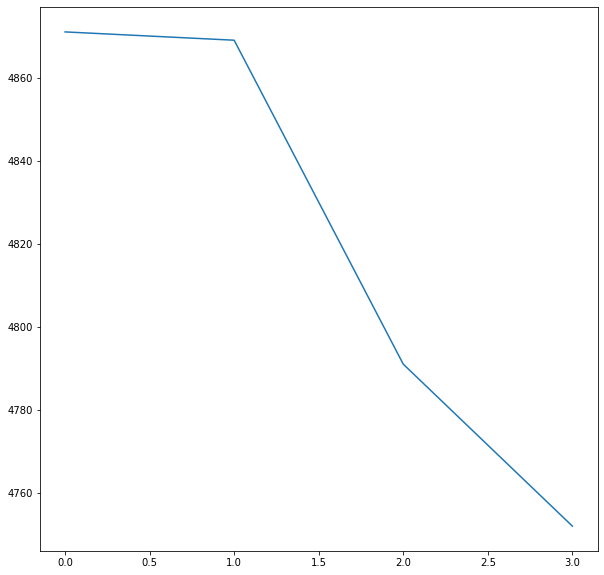

In [245]:
r = r_s2f_s3f[:]; d_min=d_s2f_s3f; dm_s2f_s3f_s2f=[d_s2f_s3f]; i_s2f_s3f_s2f=[0]; j_s2f_s3f_s2f=[0]; dc_s2f_s3f_s2f=[0];
while swap2first():
    dm_s2f_s3f_s2f.append(d_min)
    i_s2f_s3f_s2f.append(i_opt)
    j_s2f_s3f_s2f.append(j_opt)
    dc_s2f_s3f_s2f.append(dc_min)
d_s2f_s3f_s2f = d_min
r_s2f_s3f_s2f = r
print("dm_s2f_s3f_s2f =",dm_s2f_s3f_s2f)
print("d_s2f_s3f_s2f =",d_s2f_s3f_s2f)
print("r_s2f_s3f_s2f =",r)
print("i_s2f_s3f_s2f =",i_s2f_s3f_s2f)
print("j_s2f_s3f_s2f =",j_s2f_s3f_s2f)
print("dc_s2f_s3f_s2f =",dc_s2f_s3f_s2f)
if d_s2f_s3f_s2f < d_s2f_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2f_s3f_s2f)

### s2f + s3f + s2b

1<->3; dc=-78.0; d = 4871.1
12<->7; dc=-39.0; d = 4793.1
19<->2; dc=-2.0; d = 4754.1
dm_s2f_s3f_s2b = [4871.1, 4793.1, 4754.1, 4752.1]
d_s2f_s3f_s2b = 4752.1
r_s2f_s3f_s2b = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3f_s2b = [0, 11, 18, 1]
j_s2f_s3f_s2b = [0, 12, 19, 7]
dc_s2f_s3f_s2b = [0, -78.0, -39.0, -2.0]
Verification is successful:
r = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
Distance = 4752.1


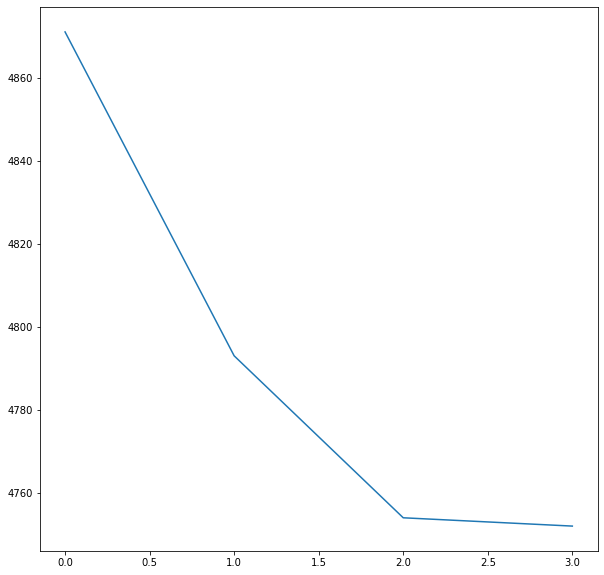

In [246]:
r = r_s2f_s3f[:]; d_min=d_s2f_s3f; dm_s2f_s3f_s2b=[d_s2f_s3f]; i_s2f_s3f_s2b=[0]; j_s2f_s3f_s2b=[0]; dc_s2f_s3f_s2b=[0];
while swap2best():
    dm_s2f_s3f_s2b.append(d_min)
    i_s2f_s3f_s2b.append(i_opt)
    j_s2f_s3f_s2b.append(j_opt)
    dc_s2f_s3f_s2b.append(dc_min)
d_s2f_s3f_s2b = d_min
r_s2f_s3f_s2b = r
print("dm_s2f_s3f_s2b =",dm_s2f_s3f_s2b)
print("d_s2f_s3f_s2b =",d_s2f_s3f_s2b)
print("r_s2f_s3f_s2b =",r)
print("i_s2f_s3f_s2b =",i_s2f_s3f_s2b)
print("j_s2f_s3f_s2b =",j_s2f_s3f_s2b)
print("dc_s2f_s3f_s2b =",dc_s2f_s3f_s2b)
if d_s2f_s3f_s2b < d_s2f_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2f_s3f_s2b)

### s2f + s3b + s2f

16<->11; dc=-128.0; d = 4541.1
7<->12; dc=-39.0; d = 4502.1
dm_s2f_s3b_s2f = [4669.1, 4541.1, 4502.1]
d_s2f_s3b_s2f = 4502.1
r_s2f_s3b_s2f = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3b_s2f = [0, 5, 18]
j_s2f_s3b_s2f = [0, 6, 19]
dc_s2f_s3b_s2f = [0, -128.0, -39.0]
Verification is successful:
r = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
Distance = 4502.1


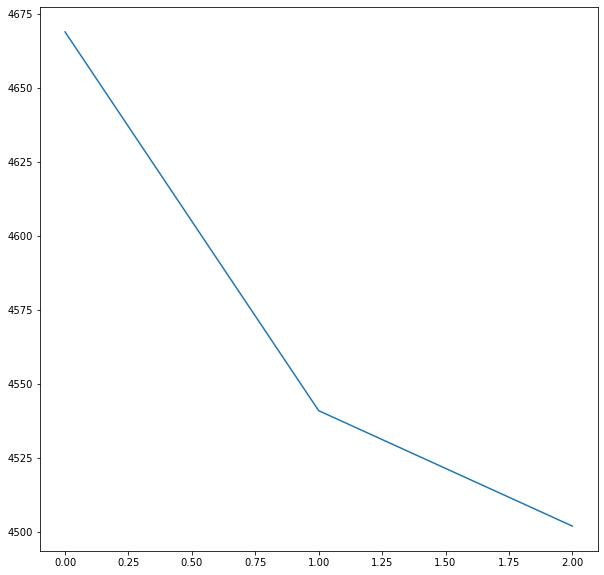

In [247]:
r = r_s2f_s3b[:]; d_min=d_s2f_s3b; dm_s2f_s3b_s2f=[d_s2f_s3b]; i_s2f_s3b_s2f=[0]; j_s2f_s3b_s2f=[0]; dc_s2f_s3b_s2f=[0];
while swap2first():
    dm_s2f_s3b_s2f.append(d_min)
    i_s2f_s3b_s2f.append(i_opt)
    j_s2f_s3b_s2f.append(j_opt)
    dc_s2f_s3b_s2f.append(dc_min)
d_s2f_s3b_s2f = d_min
r_s2f_s3b_s2f = r
print("dm_s2f_s3b_s2f =",dm_s2f_s3b_s2f)
print("d_s2f_s3b_s2f =",d_s2f_s3b_s2f)
print("r_s2f_s3b_s2f =",r)
print("i_s2f_s3b_s2f =",i_s2f_s3b_s2f)
print("j_s2f_s3b_s2f =",j_s2f_s3b_s2f)
print("dc_s2f_s3b_s2f =",dc_s2f_s3b_s2f)
if d_s2f_s3b_s2f < d_s2f_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2f_s3b_s2f)

### s2f + s3b + s2b

11<->16; dc=-128.0; d = 4669.1
12<->7; dc=-39.0; d = 4541.1
dm_s2f_s3b_s2b = [4669.1, 4541.1, 4502.1]
d_s2f_s3b_s2b = 4502.1
r_s2f_s3b_s2b = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3b_s2b = [0, 5, 18]
j_s2f_s3b_s2b = [0, 6, 19]
dc_s2f_s3b_s2b = [0, -128.0, -39.0]
Verification is successful:
r = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
Distance = 4502.1


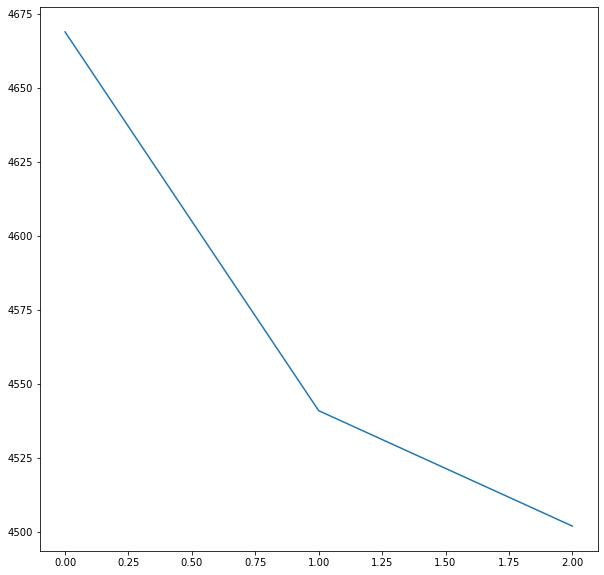

In [248]:
r = r_s2f_s3b[:]; d_min=d_s2f_s3b; dm_s2f_s3b_s2b=[d_s2f_s3b]; i_s2f_s3b_s2b=[0]; j_s2f_s3b_s2b=[0]; dc_s2f_s3b_s2b=[0];
while swap2best():
    dm_s2f_s3b_s2b.append(d_min)
    i_s2f_s3b_s2b.append(i_opt)
    j_s2f_s3b_s2b.append(j_opt)
    dc_s2f_s3b_s2b.append(dc_min)
d_s2f_s3b_s2b = d_min
r_s2f_s3b_s2b = r
print("dm_s2f_s3b_s2b =",dm_s2f_s3b_s2b)
print("d_s2f_s3b_s2b =",d_s2f_s3b_s2b)
print("r_s2f_s3b_s2b =",r)
print("i_s2f_s3b_s2b =",i_s2f_s3b_s2b)
print("j_s2f_s3b_s2b =",j_s2f_s3b_s2b)
print("dc_s2f_s3b_s2b =",dc_s2f_s3b_s2b)
if d_s2f_s3b_s2b < d_s2f_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2f_s3b_s2b)

### s2b + s3f + s2f

9<->17; dc=-8.0; d = 4232.1
dm_s2b_s3f_s2f = [4240.1, 4232.1]
d_s2b_s3f_s2f = 4232.1
r_s2b_s3f_s2f = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3f_s2f = [0, 10]
j_s2b_s3f_s2f = [0, 11]
dc_s2b_s3f_s2f = [0, -8.0]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
Distance = 4232.1


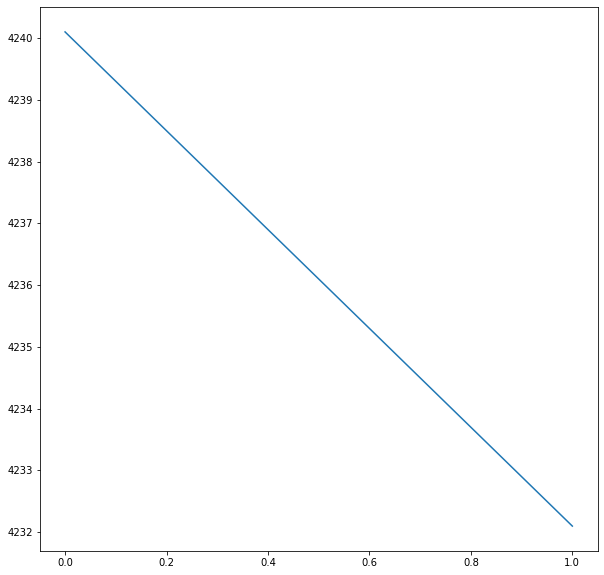

In [249]:
r = r_s2b_s3f[:]; d_min=d_s2b_s3f; dm_s2b_s3f_s2f=[d_s2b_s3f]; i_s2b_s3f_s2f=[0]; j_s2b_s3f_s2f=[0]; dc_s2b_s3f_s2f=[0];
while swap2first():
    dm_s2b_s3f_s2f.append(d_min)
    i_s2b_s3f_s2f.append(i_opt)
    j_s2b_s3f_s2f.append(j_opt)
    dc_s2b_s3f_s2f.append(dc_min)
d_s2b_s3f_s2f = d_min
r_s2b_s3f_s2f = r
print("dm_s2b_s3f_s2f =",dm_s2b_s3f_s2f)
print("d_s2b_s3f_s2f =",d_s2b_s3f_s2f)
print("r_s2b_s3f_s2f =",r)
print("i_s2b_s3f_s2f =",i_s2b_s3f_s2f)
print("j_s2b_s3f_s2f =",j_s2b_s3f_s2f)
print("dc_s2b_s3f_s2f =",dc_s2b_s3f_s2f)
if d_s2b_s3f_s2f < d_s2b_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2b_s3f_s2f)

### s2b + s3f + s2b

17<->9; dc=-8.0; d = 4240.1
dm_s2b_s3f_s2b = [4240.1, 4232.1]
d_s2b_s3f_s2b = 4232.1
r_s2b_s3f_s2b = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3f_s2b = [0, 10]
j_s2b_s3f_s2b = [0, 11]
dc_s2b_s3f_s2b = [0, -8.0]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
Distance = 4232.1


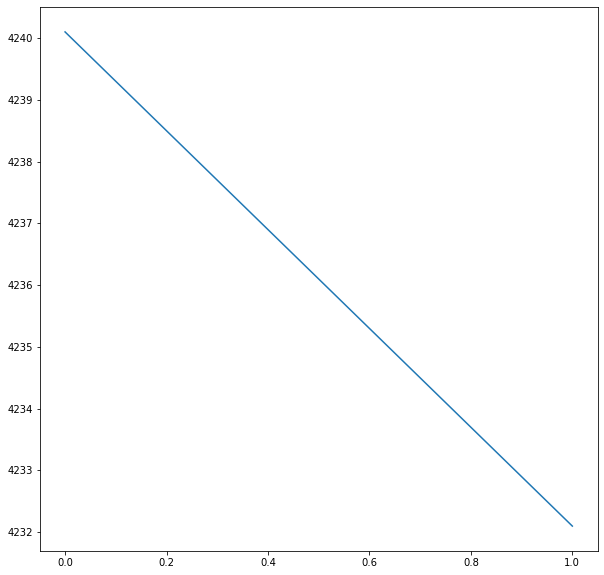

In [250]:
r = r_s2b_s3f[:]; d_min=d_s2b_s3f; dm_s2b_s3f_s2b=[d_s2b_s3f]; i_s2b_s3f_s2b=[0]; j_s2b_s3f_s2b=[0]; dc_s2b_s3f_s2b=[0];
while swap2best():
    dm_s2b_s3f_s2b.append(d_min)
    i_s2b_s3f_s2b.append(i_opt)
    j_s2b_s3f_s2b.append(j_opt)
    dc_s2b_s3f_s2b.append(dc_min)
d_s2b_s3f_s2b = d_min
r_s2b_s3f_s2b = r
print("dm_s2b_s3f_s2b =",dm_s2b_s3f_s2b)
print("d_s2b_s3f_s2b =",d_s2b_s3f_s2b)
print("r_s2b_s3f_s2b =",r)
print("i_s2b_s3f_s2b =",i_s2b_s3f_s2b)
print("j_s2b_s3f_s2b =",j_s2b_s3f_s2b)
print("dc_s2b_s3f_s2b =",dc_s2b_s3f_s2b)
if d_s2b_s3f_s2b < d_s2b_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2b_s3f_s2b)

### s2b + s3b + s2f

9<->17; dc=-8.0; d = 4232.1
dm_s2b_s3b_s2f = [4240.1, 4232.1]
d_s2b_s3b_s2f = 4232.1
r_s2b_s3b_s2f = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3b_s2f = [0, 10]
j_s2b_s3b_s2f = [0, 11]
dc_s2b_s3b_s2f = [0, -8.0]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
Distance = 4232.1


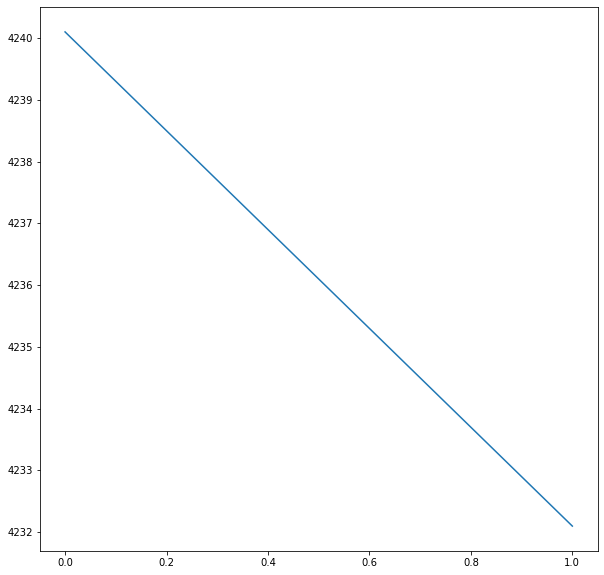

In [251]:
r = r_s2b_s3b[:]; d_min=d_s2b_s3b; dm_s2b_s3b_s2f=[d_s2b_s3b]; i_s2b_s3b_s2f=[0]; j_s2b_s3b_s2f=[0]; dc_s2b_s3b_s2f=[0];
while swap2first():
    dm_s2b_s3b_s2f.append(d_min)
    i_s2b_s3b_s2f.append(i_opt)
    j_s2b_s3b_s2f.append(j_opt)
    dc_s2b_s3b_s2f.append(dc_min)
d_s2b_s3b_s2f = d_min
r_s2b_s3b_s2f = r
print("dm_s2b_s3b_s2f =",dm_s2b_s3b_s2f)
print("d_s2b_s3b_s2f =",d_s2b_s3b_s2f)
print("r_s2b_s3b_s2f =",r)
print("i_s2b_s3b_s2f =",i_s2b_s3b_s2f)
print("j_s2b_s3b_s2f =",j_s2b_s3b_s2f)
print("dc_s2b_s3b_s2f =",dc_s2b_s3b_s2f)
if d_s2b_s3b_s2f < d_s2b_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2b_s3b_s2f)

### s2b + s3b + s2b

17<->9; dc=-8.0; d = 4240.1
dm_s2b_s3b_s2b = [4240.1, 4232.1]
d_s2b_s3b_s2b = 4232.1
r_s2b_s3b_s2b = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3b_s2b = [0, 10]
j_s2b_s3b_s2b = [0, 11]
dc_s2b_s3b_s2b = [0, -8.0]
Verification is successful:
r = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
Distance = 4232.1


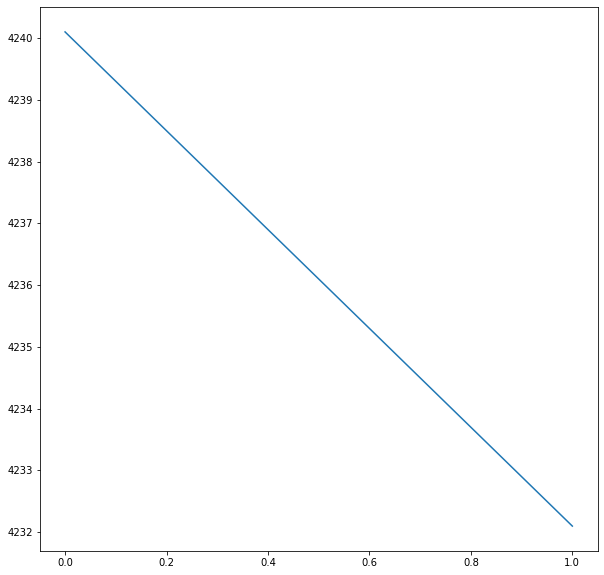

In [252]:
r = r_s2b_s3b[:]; d_min=d_s2b_s3b; dm_s2b_s3b_s2b=[d_s2b_s3b]; i_s2b_s3b_s2b=[0]; j_s2b_s3b_s2b=[0]; dc_s2b_s3b_s2b=[0];
while swap2best():
    dm_s2b_s3b_s2b.append(d_min)
    i_s2b_s3b_s2b.append(i_opt)
    j_s2b_s3b_s2b.append(j_opt)
    dc_s2b_s3b_s2b.append(dc_min)
d_s2b_s3b_s2b = d_min
r_s2b_s3b_s2b = r
print("dm_s2b_s3b_s2b =",dm_s2b_s3b_s2b)
print("d_s2b_s3b_s2b =",d_s2b_s3b_s2b)
print("r_s2b_s3b_s2b =",r)
print("i_s2b_s3b_s2b =",i_s2b_s3b_s2b)
print("j_s2b_s3b_s2b =",j_s2b_s3b_s2b)
print("dc_s2b_s3b_s2b =",dc_s2b_s3b_s2b)
if d_s2b_s3b_s2b < d_s2b_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s2b_s3b_s2b)

### s3f + s2f + s3f

In [300]:
r = r_s3f_s2f[:]; d_min=d_s3f_s2f; dm_s3f_s2f_s3f=[d_s3f_s2f]; i_s3f_s2f_s3f=[0]; j_s3f_s2f_s3f=[0]; dc_s3f_s2f_s3f=[0];
while swap3first():
    dm_s3f_s2f_s3f.append(d_min)
    i_s3f_s2f_s3f.append(i_opt)
    j_s3f_s2f_s3f.append(j_opt)
    dc_s3f_s2f_s3f.append(dc_min)
d_s3f_s2f_s3f = d_min
r_s3f_s2f_s3f = r
print("dm_s3f_s2f_s3f =",dm_s3f_s2f_s3f)
print("d_s3f_s2f_s3f =",d_s3f_s2f_s3f)
print("r_s3f_s2f_s3f =",r)
print("i_s3f_s2f_s3f =",i_s3f_s2f_s3f)
print("j_s3f_s2f_s3f =",j_s3f_s2f_s3f)
print("dc_s3f_s2f_s3f =",dc_s3f_s2f_s3f)
if d_s3f_s2f_s3f < d_s3f_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3f_s2f_s3f)

dm_s3f_s2f_s3f = [4014.1]
d_s3f_s2f_s3f = 4014.1
r_s3f_s2f_s3f = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2f_s3f = [0]
j_s3f_s2f_s3f = [0]
dc_s3f_s2f_s3f = [0]


### s3f + s2f + s3b

In [301]:
r = r_s3f_s2f[:]; d_min=d_s3f_s2f; dm_s3f_s2f_s3b=[d_s3f_s2f]; i_s3f_s2f_s3b=[0]; j_s3f_s2f_s3b=[0]; dc_s3f_s2f_s3b=[0];
while swap3best():
    dm_s3f_s2f_s3b.append(d_min)
    i_s3f_s2f_s3b.append(i_opt)
    j_s3f_s2f_s3b.append(j_opt)
    dc_s3f_s2f_s3b.append(dc_min)
d_s3f_s2f_s3b = d_min
r_s3f_s2f_s3b = r
print("dm_s3f_s2f_s3b =",dm_s3f_s2f_s3b)
print("d_s3f_s2f_s3b =",d_s3f_s2f_s3b)
print("r_s3f_s2f_s3b =",r)
print("i_s3f_s2f_s3b =",i_s3f_s2f_s3b)
print("j_s3f_s2f_s3b =",j_s3f_s2f_s3b)
print("dc_s3f_s2f_s3b =",dc_s3f_s2f_s3b)
if d_s3f_s2f_s3b < d_s3f_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3f_s2f_s3b)

dm_s3f_s2f_s3b = [4014.1]
d_s3f_s2f_s3b = 4014.1
r_s3f_s2f_s3b = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2f_s3b = [0]
j_s3f_s2f_s3b = [0]
dc_s3f_s2f_s3b = [0]


### s3f + s2b + s3f

In [303]:
r = r_s3f_s2b[:]; d_min=d_s3f_s2b; dm_s3f_s2b_s3f=[d_s3f_s2b]; i_s3f_s2b_s3f=[0]; j_s3f_s2b_s3f=[0]; dc_s3f_s2b_s3f=[0];
while swap3first():
    dm_s3f_s2b_s3f.append(d_min)
    i_s3f_s2b_s3f.append(i_opt)
    j_s3f_s2b_s3f.append(j_opt)
    dc_s3f_s2b_s3f.append(dc_min)
d_s3f_s2b_s3f = d_min
r_s3f_s2b_s3f = r
print("dm_s3f_s2b_s3f =",dm_s3f_s2b_s3f)
print("d_s3f_s2b_s3f =",d_s3f_s2b_s3f)
print("r_s3f_s2b_s3f =",r)
print("i_s3f_s2b_s3f =",i_s3f_s2b_s3f)
print("j_s3f_s2b_s3f =",j_s3f_s2b_s3f)
print("dc_s3f_s2b_s3f =",dc_s3f_s2b_s3f)
if d_s3f_s2b_s3f < d_s3f_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3f_s2b_s3f)

dm_s3f_s2b_s3f = [4014.1]
d_s3f_s2b_s3f = 4014.1
r_s3f_s2b_s3f = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2b_s3f = [0]
j_s3f_s2b_s3f = [0]
dc_s3f_s2b_s3f = [0]


### s3f + s2b + s3b

In [305]:
r = r_s3f_s2b[:]; d_min=d_s3f_s2b; dm_s3f_s2b_s3b=[d_s3f_s2b]; i_s3f_s2b_s3b=[0]; j_s3f_s2b_s3b=[0]; dc_s3f_s2b_s3b=[0];
while swap3best():
    dm_s3f_s2b_s3b.append(d_min)
    i_s3f_s2b_s3b.append(i_opt)
    j_s3f_s2b_s3b.append(j_opt)
    dc_s3f_s2b_s3b.append(dc_min)
d_s3f_s2b_s3b = d_min
r_s3f_s2b_s3b = r
print("dm_s3f_s2b_s3b =",dm_s3f_s2b_s3b)
print("d_s3f_s2b_s3b =",d_s3f_s2b_s3b)
print("r_s3f_s2b_s3b =",r)
print("i_s3f_s2b_s3b =",i_s3f_s2b_s3b)
print("j_s3f_s2b_s3b =",j_s3f_s2b_s3b)
print("dc_s3f_s2b_s3b =",dc_s3f_s2b_s3b)
if d_s3f_s2b_s3b < d_s3f_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3f_s2b_s3b)

dm_s3f_s2b_s3b = [4014.1]
d_s3f_s2b_s3b = 4014.1
r_s3f_s2b_s3b = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2b_s3b = [0]
j_s3f_s2b_s3b = [0]
dc_s3f_s2b_s3b = [0]


### s3b + s2f + s3f

In [309]:
r = r_s3b_s2f[:]; d_min=d_s3b_s2f; dm_s3b_s2f_s3f=[d_s3b_s2f]; i_s3b_s2f_s3f=[0]; j_s3b_s2f_s3f=[0]; dc_s3b_s2f_s3f=[0];
while swap3first():
    dm_s3b_s2f_s3f.append(d_min)
    i_s3b_s2f_s3f.append(i_opt)
    j_s3b_s2f_s3f.append(j_opt)
    dc_s3b_s2f_s3f.append(dc_min)
d_s3b_s2f_s3f = d_min
r_s3b_s2f_s3f = r
print("dm_s3b_s2f_s3f =",dm_s3b_s2f_s3f)
print("d_s3b_s2f_s3f =",d_s3b_s2f_s3f)
print("r_s3b_s2f_s3f =",r)
print("i_s3b_s2f_s3f =",i_s3b_s2f_s3f)
print("j_s3b_s2f_s3f =",j_s3b_s2f_s3f)
print("dc_s3b_s2f_s3f =",dc_s3b_s2f_s3f)
if d_s3b_s2f_s3f < d_s3b_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3b_s2f_s3f)

dm_s3b_s2f_s3f = [4712.1]
d_s3b_s2f_s3f = 4712.1
r_s3b_s2f_s3f = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2f_s3f = [0]
j_s3b_s2f_s3f = [0]
dc_s3b_s2f_s3f = [0]


### s3b + s2f + s3b

In [311]:
r = r_s3b_s2f[:]; d_min=d_s3b_s2f; dm_s3b_s2f_s3b=[d_s3b_s2f]; i_s3b_s2f_s3b=[0]; j_s3b_s2f_s3b=[0]; dc_s3b_s2f_s3b=[0];
while swap3best():
    dm_s3b_s2f_s3b.append(d_min)
    i_s3b_s2f_s3b.append(i_opt)
    j_s3b_s2f_s3b.append(j_opt)
    dc_s3b_s2f_s3b.append(dc_min)
d_s3b_s2f_s3b = d_min
r_s3b_s2f_s3b = r
print("dm_s3b_s2f_s3b =",dm_s3b_s2f_s3b)
print("d_s3b_s2f_s3b =",d_s3b_s2f_s3b)
print("r_s3b_s2f_s3b =",r)
print("i_s3b_s2f_s3b =",i_s3b_s2f_s3b)
print("j_s3b_s2f_s3b =",j_s3b_s2f_s3b)
print("dc_s3b_s2f_s3b =",dc_s3b_s2f_s3b)
if d_s3b_s2f_s3b < d_s3b_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3b_s2f_s3b)

dm_s3b_s2f_s3b = [4712.1]
d_s3b_s2f_s3b = 4712.1
r_s3b_s2f_s3b = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2f_s3b = [0]
j_s3b_s2f_s3b = [0]
dc_s3b_s2f_s3b = [0]


### s3b + s2b + s3f

In [313]:
r = r_s3b_s2b[:]; d_min=d_s3b_s2b; dm_s3b_s2b_s3f=[d_s3b_s2b]; i_s3b_s2b_s3f=[0]; j_s3b_s2b_s3f=[0]; dc_s3b_s2b_s3f=[0];
while swap3first():
    dm_s3b_s2b_s3f.append(d_min)
    i_s3b_s2b_s3f.append(i_opt)
    j_s3b_s2b_s3f.append(j_opt)
    dc_s3b_s2b_s3f.append(dc_min)
d_s3b_s2b_s3f = d_min
r_s3b_s2b_s3f = r
print("dm_s3b_s2b_s3f =",dm_s3b_s2b_s3f)
print("d_s3b_s2b_s3f =",d_s3b_s2b_s3f)
print("r_s3b_s2b_s3f =",r)
print("i_s3b_s2b_s3f =",i_s3b_s2b_s3f)
print("j_s3b_s2b_s3f =",j_s3b_s2b_s3f)
print("dc_s3b_s2b_s3f =",dc_s3b_s2b_s3f)
if d_s3b_s2b_s3f < d_s3b_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3b_s2b_s3f)

dm_s3b_s2b_s3f = [4712.1]
d_s3b_s2b_s3f = 4712.1
r_s3b_s2b_s3f = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2b_s3f = [0]
j_s3b_s2b_s3f = [0]
dc_s3b_s2b_s3f = [0]


### s3b + s2b + s3b

In [315]:
r = r_s3b_s2b[:]; d_min=d_s3b_s2b; dm_s3b_s2b_s3b=[d_s3b_s2b]; i_s3b_s2b_s3b=[0]; j_s3b_s2b_s3b=[0]; dc_s3b_s2b_s3b=[0];
while swap3best():
    dm_s3b_s2b_s3b.append(d_min)
    i_s3b_s2b_s3b.append(i_opt)
    j_s3b_s2b_s3b.append(j_opt)
    dc_s3b_s2b_s3b.append(dc_min)
d_s3b_s2b_s3b = d_min
r_s3b_s2b_s3b = r
print("dm_s3b_s2b_s3b =",dm_s3b_s2b_s3b)
print("d_s3b_s2b_s3b =",d_s3b_s2b_s3b)
print("r_s3b_s2b_s3b =",r)
print("i_s3b_s2b_s3b =",i_s3b_s2b_s3b)
print("j_s3b_s2b_s3b =",j_s3b_s2b_s3b)
print("dc_s3b_s2b_s3b =",dc_s3b_s2b_s3b)
if d_s3b_s2b_s3b < d_s3b_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_s3b_s2b_s3b)

dm_s3b_s2b_s3b = [4712.1]
d_s3b_s2b_s3b = 4712.1
r_s3b_s2b_s3b = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2b_s3b = [0]
j_s3b_s2b_s3b = [0]
dc_s3b_s2b_s3b = [0]


### NN + s2f + s3f + s2f

In [253]:
r = r_nn_s2f_s3f[:]; d_min=d_nn_s2f_s3f; dm_nn_s2f_s3f_s2f=[d_nn_s2f_s3f]; i_nn_s2f_s3f_s2f=[0]; j_nn_s2f_s3f_s2f=[0]; dc_nn_s2f_s3f_s2f=[0];
while swap2first():
    dm_nn_s2f_s3f_s2f.append(d_min)
    i_nn_s2f_s3f_s2f.append(i_opt)
    j_nn_s2f_s3f_s2f.append(j_opt)
    dc_nn_s2f_s3f_s2f.append(dc_min)
d_nn_s2f_s3f_s2f = d_min
r_nn_s2f_s3f_s2f = r
print("dm_nn_s2f_s3f_s2f =",dm_nn_s2f_s3f_s2f)
print("d_nn_s2f_s3f_s2f =",d_nn_s2f_s3f_s2f)
print("r_nn_s2f_s3f_s2f =",r)
print("i_nn_s2f_s3f_s2f =",i_nn_s2f_s3f_s2f)
print("j_nn_s2f_s3f_s2f =",j_nn_s2f_s3f_s2f)
print("dc_nn_s2f_s3f_s2f =",dc_nn_s2f_s3f_s2f)
if d_nn_s2f_s3f_s2f < d_nn_s2f_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2f_s3f_s2f)

dm_nn_s2f_s3f_s2f = [4362.1]
d_nn_s2f_s3f_s2f = 4362.1
r_nn_s2f_s3f_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3f_s2f = [0]
j_nn_s2f_s3f_s2f = [0]
dc_nn_s2f_s3f_s2f = [0]


### NN + s2f + s3f + s2b

In [254]:
r = r_nn_s2f_s3f[:]; d_min=d_nn_s2f_s3f; dm_nn_s2f_s3f_s2b=[d_nn_s2f_s3f]; i_nn_s2f_s3f_s2b=[0]; j_nn_s2f_s3f_s2b=[0]; dc_nn_s2f_s3f_s2b=[0];
while swap2best():
    dm_nn_s2f_s3f_s2b.append(d_min)
    i_nn_s2f_s3f_s2b.append(i_opt)
    j_nn_s2f_s3f_s2b.append(j_opt)
    dc_nn_s2f_s3f_s2b.append(dc_min)
d_nn_s2f_s3f_s2b = d_min
r_nn_s2f_s3f_s2b = r
print("dm_nn_s2f_s3f_s2b =",dm_nn_s2f_s3f_s2b)
print("d_nn_s2f_s3f_s2b =",d_nn_s2f_s3f_s2b)
print("r_nn_s2f_s3f_s2b =",r)
print("i_nn_s2f_s3f_s2b =",i_nn_s2f_s3f_s2b)
print("j_nn_s2f_s3f_s2b =",j_nn_s2f_s3f_s2b)
print("dc_nn_s2f_s3f_s2b =",dc_nn_s2f_s3f_s2b)
if d_nn_s2f_s3f_s2b < d_nn_s2f_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2f_s3f_s2b)

dm_nn_s2f_s3f_s2b = [4362.1]
d_nn_s2f_s3f_s2b = 4362.1
r_nn_s2f_s3f_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3f_s2b = [0]
j_nn_s2f_s3f_s2b = [0]
dc_nn_s2f_s3f_s2b = [0]


### NN + s2f + s3b + s2f

In [255]:
r = r_nn_s2f_s3b[:]; d_min=d_nn_s2f_s3b; dm_nn_s2f_s3b_s2f=[d_nn_s2f_s3b]; i_nn_s2f_s3b_s2f=[0]; j_nn_s2f_s3b_s2f=[0]; dc_nn_s2f_s3b_s2f=[0];
while swap2first():
    dm_nn_s2f_s3b_s2f.append(d_min)
    i_nn_s2f_s3b_s2f.append(i_opt)
    j_nn_s2f_s3b_s2f.append(j_opt)
    dc_nn_s2f_s3b_s2f.append(dc_min)
d_nn_s2f_s3b_s2f = d_min
r_nn_s2f_s3b_s2f = r
print("dm_nn_s2f_s3b_s2f =",dm_nn_s2f_s3b_s2f)
print("d_nn_s2f_s3b_s2f =",d_nn_s2f_s3b_s2f)
print("r_nn_s2f_s3b_s2f =",r)
print("i_nn_s2f_s3b_s2f =",i_nn_s2f_s3b_s2f)
print("j_nn_s2f_s3b_s2f =",j_nn_s2f_s3b_s2f)
print("dc_nn_s2f_s3b_s2f =",dc_nn_s2f_s3b_s2f)
if d_nn_s2f_s3b_s2f < d_nn_s2f_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2f_s3b_s2f)

dm_nn_s2f_s3b_s2f = [4362.1]
d_nn_s2f_s3b_s2f = 4362.1
r_nn_s2f_s3b_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3b_s2f = [0]
j_nn_s2f_s3b_s2f = [0]
dc_nn_s2f_s3b_s2f = [0]


### NN + s2f + s3b + s2b

In [259]:
r = r_nn_s2f_s3b[:]; d_min=d_nn_s2f_s3b; dm_nn_s2f_s3b_s2b=[d_nn_s2f_s3b]; i_nn_s2f_s3b_s2b=[0]; j_nn_s2f_s3b_s2b=[0]; dc_nn_s2f_s3b_s2b=[0];
while swap2best():
    dm_nn_s2f_s3b_s2b.append(d_min)
    i_nn_s2f_s3b_s2b.append(i_opt)
    j_nn_s2f_s3b_s2b.append(j_opt)
    dc_nn_s2f_s3b_s2b.append(dc_min)
d_nn_s2f_s3b_s2b = d_min
r_nn_s2f_s3b_s2b = r
print("dm_nn_s2f_s3b_s2b =",dm_nn_s2f_s3b_s2b)
print("d_nn_s2f_s3b_s2b =",d_nn_s2f_s3b_s2b)
print("r_nn_s2f_s3b_s2b =",r)
print("i_nn_s2f_s3b_s2b =",i_nn_s2f_s3b_s2b)
print("j_nn_s2f_s3b_s2b =",j_nn_s2f_s3b_s2b)
print("dc_nn_s2f_s3b_s2b =",dc_nn_s2f_s3b_s2b)
if d_nn_s2f_s3b_s2b < d_nn_s2f_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2f_s3b_s2b)

dm_nn_s2f_s3b_s2b = [4362.1]
d_nn_s2f_s3b_s2b = 4362.1
r_nn_s2f_s3b_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3b_s2b = [0]
j_nn_s2f_s3b_s2b = [0]
dc_nn_s2f_s3b_s2b = [0]


### NN + s2b + s3f + s2f

In [263]:
r = r_nn_s2b_s3f[:]; d_min=d_nn_s2b_s3f; dm_nn_s2b_s3f_s2f=[d_nn_s2b_s3f]; i_nn_s2b_s3f_s2f=[0]; j_nn_s2b_s3f_s2f=[0]; dc_nn_s2b_s3f_s2f=[0];
while swap2first():
    dm_nn_s2b_s3f_s2f.append(d_min)
    i_nn_s2b_s3f_s2f.append(i_opt)
    j_nn_s2b_s3f_s2f.append(j_opt)
    dc_nn_s2b_s3f_s2f.append(dc_min)
d_nn_s2b_s3f_s2f = d_min
r_nn_s2b_s3f_s2f = r
print("dm_nn_s2b_s3f_s2f =",dm_nn_s2b_s3f_s2f)
print("d_nn_s2b_s3f_s2f =",d_nn_s2b_s3f_s2f)
print("r_nn_s2b_s3f_s2f =",r)
print("i_nn_s2b_s3f_s2f =",i_nn_s2b_s3f_s2f)
print("j_nn_s2b_s3f_s2f =",j_nn_s2b_s3f_s2f)
print("dc_nn_s2b_s3f_s2f =",dc_nn_s2b_s3f_s2f)
if d_nn_s2b_s3f_s2f < d_nn_s2b_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2b_s3f_s2f)

dm_nn_s2b_s3f_s2f = [4362.1]
d_nn_s2b_s3f_s2f = 4362.1
r_nn_s2b_s3f_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3f_s2f = [0]
j_nn_s2b_s3f_s2f = [0]
dc_nn_s2b_s3f_s2f = [0]


### NN + s2b + s3f + s2b

In [264]:
r = r_nn_s2b_s3f[:]; d_min=d_nn_s2b_s3f; dm_nn_s2b_s3f_s2b=[d_nn_s2b_s3f]; i_nn_s2b_s3f_s2b=[0]; j_nn_s2b_s3f_s2b=[0]; dc_nn_s2b_s3f_s2b=[0];
while swap2best():
    dm_nn_s2b_s3f_s2b.append(d_min)
    i_nn_s2b_s3f_s2b.append(i_opt)
    j_nn_s2b_s3f_s2b.append(j_opt)
    dc_nn_s2b_s3f_s2b.append(dc_min)
d_nn_s2b_s3f_s2b = d_min
r_nn_s2b_s3f_s2b = r
print("dm_nn_s2b_s3f_s2b =",dm_nn_s2b_s3f_s2b)
print("d_nn_s2b_s3f_s2b =",d_nn_s2b_s3f_s2b)
print("r_nn_s2b_s3f_s2b =",r)
print("i_nn_s2b_s3f_s2b =",i_nn_s2b_s3f_s2b)
print("j_nn_s2b_s3f_s2b =",j_nn_s2b_s3f_s2b)
print("dc_nn_s2b_s3f_s2b =",dc_nn_s2b_s3f_s2b)
if d_nn_s2b_s3f_s2b < d_nn_s2b_s3f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2b_s3f_s2b)

dm_nn_s2b_s3f_s2b = [4362.1]
d_nn_s2b_s3f_s2b = 4362.1
r_nn_s2b_s3f_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3f_s2b = [0]
j_nn_s2b_s3f_s2b = [0]
dc_nn_s2b_s3f_s2b = [0]


### NN + s2b + s3b + s2f

In [266]:
r = r_nn_s2b_s3b[:]; d_min=d_nn_s2b_s3b; dm_nn_s2b_s3b_s2f=[d_nn_s2b_s3b]; i_nn_s2b_s3b_s2f=[0]; j_nn_s2b_s3b_s2f=[0]; dc_nn_s2b_s3b_s2f=[0];
while swap2first():
    dm_nn_s2b_s3b_s2f.append(d_min)
    i_nn_s2b_s3b_s2f.append(i_opt)
    j_nn_s2b_s3b_s2f.append(j_opt)
    dc_nn_s2b_s3b_s2f.append(dc_min)
d_nn_s2b_s3b_s2f = d_min
r_nn_s2b_s3b_s2f = r
print("dm_nn_s2b_s3b_s2f =",dm_nn_s2b_s3b_s2f)
print("d_nn_s2b_s3b_s2f =",d_nn_s2b_s3b_s2f)
print("r_nn_s2b_s3b_s2f =",r)
print("i_nn_s2b_s3b_s2f =",i_nn_s2b_s3b_s2f)
print("j_nn_s2b_s3b_s2f =",j_nn_s2b_s3b_s2f)
print("dc_nn_s2b_s3b_s2f =",dc_nn_s2b_s3b_s2f)
if d_nn_s2b_s3b_s2f < d_nn_s2b_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2b_s3b_s2f)

dm_nn_s2b_s3b_s2f = [4362.1]
d_nn_s2b_s3b_s2f = 4362.1
r_nn_s2b_s3b_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3b_s2f = [0]
j_nn_s2b_s3b_s2f = [0]
dc_nn_s2b_s3b_s2f = [0]


### NN + s2b + s3b + s2b

In [268]:
r = r_nn_s2b_s3b[:]; d_min=d_nn_s2b_s3b; dm_nn_s2b_s3b_s2b=[d_nn_s2b_s3b]; i_nn_s2b_s3b_s2b=[0]; j_nn_s2b_s3b_s2b=[0]; dc_nn_s2b_s3b_s2b=[0];
while swap2best():
    dm_nn_s2b_s3b_s2b.append(d_min)
    i_nn_s2b_s3b_s2b.append(i_opt)
    j_nn_s2b_s3b_s2b.append(j_opt)
    dc_nn_s2b_s3b_s2b.append(dc_min)
d_nn_s2b_s3b_s2b = d_min
r_nn_s2b_s3b_s2b = r
print("dm_nn_s2b_s3b_s2b =",dm_nn_s2b_s3b_s2b)
print("d_nn_s2b_s3b_s2b =",d_nn_s2b_s3b_s2b)
print("r_nn_s2b_s3b_s2b =",r)
print("i_nn_s2b_s3b_s2b =",i_nn_s2b_s3b_s2b)
print("j_nn_s2b_s3b_s2b =",j_nn_s2b_s3b_s2b)
print("dc_nn_s2b_s3b_s2b =",dc_nn_s2b_s3b_s2b)
if d_nn_s2b_s3b_s2b < d_nn_s2b_s3b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s2b_s3b_s2b)

dm_nn_s2b_s3b_s2b = [4362.1]
d_nn_s2b_s3b_s2b = 4362.1
r_nn_s2b_s3b_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3b_s2b = [0]
j_nn_s2b_s3b_s2b = [0]
dc_nn_s2b_s3b_s2b = [0]


### NN + s3f + s2f + s3f

In [273]:
r = r_nn_s3f_s2f[:]; d_min=d_nn_s3f_s2f; dm_nn_s3f_s2f_s3f=[d_nn_s3f_s2f]; i_nn_s3f_s2f_s3f=[0]; j_nn_s3f_s2f_s3f=[0]; dc_nn_s3f_s2f_s3f=[0];
while swap3first():
    dm_nn_s3f_s2f_s3f.append(d_min)
    i_nn_s3f_s2f_s3f.append(i_opt)
    j_nn_s3f_s2f_s3f.append(j_opt)
    dc_nn_s3f_s2f_s3f.append(dc_min)
d_nn_s3f_s2f_s3f = d_min
r_nn_s3f_s2f_s3f = r
print("dm_nn_s3f_s2f_s3f =",dm_nn_s3f_s2f_s3f)
print("d_nn_s3f_s2f_s3f =",d_nn_s3f_s2f_s3f)
print("r_nn_s3f_s2f_s3f =",r)
print("i_nn_s3f_s2f_s3f =",i_nn_s3f_s2f_s3f)
print("j_nn_s3f_s2f_s3f =",j_nn_s3f_s2f_s3f)
print("dc_nn_s3f_s2f_s3f =",dc_nn_s3f_s2f_s3f)
if d_nn_s3f_s2f_s3f < d_nn_s3f_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3f_s2f_s3f)

dm_nn_s3f_s2f_s3f = [4362.1]
d_nn_s3f_s2f_s3f = 4362.1
r_nn_s3f_s2f_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2f_s3f = [0]
j_nn_s3f_s2f_s3f = [0]
dc_nn_s3f_s2f_s3f = [0]


### NN + s3f + s2f + s3b

In [275]:
r = r_nn_s3f_s2f[:]; d_min=d_nn_s3f_s2f; dm_nn_s3f_s2f_s3b=[d_nn_s3f_s2f]; i_nn_s3f_s2f_s3b=[0]; j_nn_s3f_s2f_s3b=[0]; dc_nn_s3f_s2f_s3b=[0];
while swap3best():
    dm_nn_s3f_s2f_s3b.append(d_min)
    i_nn_s3f_s2f_s3b.append(i_opt)
    j_nn_s3f_s2f_s3b.append(j_opt)
    dc_nn_s3f_s2f_s3b.append(dc_min)
d_nn_s3f_s2f_s3b = d_min
r_nn_s3f_s2f_s3b = r
print("dm_nn_s3f_s2f_s3b =",dm_nn_s3f_s2f_s3b)
print("d_nn_s3f_s2f_s3b =",d_nn_s3f_s2f_s3b)
print("r_nn_s3f_s2f_s3b =",r)
print("i_nn_s3f_s2f_s3b =",i_nn_s3f_s2f_s3b)
print("j_nn_s3f_s2f_s3b =",j_nn_s3f_s2f_s3b)
print("dc_nn_s3f_s2f_s3b =",dc_nn_s3f_s2f_s3b)
if d_nn_s3f_s2f_s3b < d_nn_s3f_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3f_s2f_s3b)

dm_nn_s3f_s2f_s3b = [4362.1]
d_nn_s3f_s2f_s3b = 4362.1
r_nn_s3f_s2f_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2f_s3b = [0]
j_nn_s3f_s2f_s3b = [0]
dc_nn_s3f_s2f_s3b = [0]


### NN + s3f + s2b + s3f

In [277]:
r = r_nn_s3f_s2b[:]; d_min=d_nn_s3f_s2b; dm_nn_s3f_s2b_s3f=[d_nn_s3f_s2b]; i_nn_s3f_s2b_s3f=[0]; j_nn_s3f_s2b_s3f=[0]; dc_nn_s3f_s2b_s3f=[0];
while swap3first():
    dm_nn_s3f_s2b_s3f.append(d_min)
    i_nn_s3f_s2b_s3f.append(i_opt)
    j_nn_s3f_s2b_s3f.append(j_opt)
    dc_nn_s3f_s2b_s3f.append(dc_min)
d_nn_s3f_s2b_s3f = d_min
r_nn_s3f_s2b_s3f = r
print("dm_nn_s3f_s2b_s3f =",dm_nn_s3f_s2b_s3f)
print("d_nn_s3f_s2b_s3f =",d_nn_s3f_s2b_s3f)
print("r_nn_s3f_s2b_s3f =",r)
print("i_nn_s3f_s2b_s3f =",i_nn_s3f_s2b_s3f)
print("j_nn_s3f_s2b_s3f =",j_nn_s3f_s2b_s3f)
print("dc_nn_s3f_s2b_s3f =",dc_nn_s3f_s2b_s3f)
if d_nn_s3f_s2b_s3f < d_nn_s3f_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3f_s2b_s3f)

dm_nn_s3f_s2b_s3f = [4362.1]
d_nn_s3f_s2b_s3f = 4362.1
r_nn_s3f_s2b_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2b_s3f = [0]
j_nn_s3f_s2b_s3f = [0]
dc_nn_s3f_s2b_s3f = [0]


### NN + s3f + s2b + s3b

In [279]:
r = r_nn_s3f_s2b[:]; d_min=d_nn_s3f_s2b; dm_nn_s3f_s2b_s3b=[d_nn_s3f_s2b]; i_nn_s3f_s2b_s3b=[0]; j_nn_s3f_s2b_s3b=[0]; dc_nn_s3f_s2b_s3b=[0];
while swap3best():
    dm_nn_s3f_s2b_s3b.append(d_min)
    i_nn_s3f_s2b_s3b.append(i_opt)
    j_nn_s3f_s2b_s3b.append(j_opt)
    dc_nn_s3f_s2b_s3b.append(dc_min)
d_nn_s3f_s2b_s3b = d_min
r_nn_s3f_s2b_s3b = r
print("dm_nn_s3f_s2b_s3b =",dm_nn_s3f_s2b_s3b)
print("d_nn_s3f_s2b_s3b =",d_nn_s3f_s2b_s3b)
print("r_nn_s3f_s2b_s3b =",r)
print("i_nn_s3f_s2b_s3b =",i_nn_s3f_s2b_s3b)
print("j_nn_s3f_s2b_s3b =",j_nn_s3f_s2b_s3b)
print("dc_nn_s3f_s2b_s3b =",dc_nn_s3f_s2b_s3b)
if d_nn_s3f_s2b_s3b < d_nn_s3f_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3f_s2b_s3b)

dm_nn_s3f_s2b_s3b = [4362.1]
d_nn_s3f_s2b_s3b = 4362.1
r_nn_s3f_s2b_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2b_s3b = [0]
j_nn_s3f_s2b_s3b = [0]
dc_nn_s3f_s2b_s3b = [0]


### NN + s3b + s2f + s3f

In [283]:
r = r_nn_s3b_s2f[:]; d_min=d_nn_s3b_s2f; dm_nn_s3b_s2f_s3f=[d_nn_s3b_s2f]; i_nn_s3b_s2f_s3f=[0]; j_nn_s3b_s2f_s3f=[0]; dc_nn_s3b_s2f_s3f=[0];
while swap3first():
    dm_nn_s3b_s2f_s3f.append(d_min)
    i_nn_s3b_s2f_s3f.append(i_opt)
    j_nn_s3b_s2f_s3f.append(j_opt)
    dc_nn_s3b_s2f_s3f.append(dc_min)
d_nn_s3b_s2f_s3f = d_min
r_nn_s3b_s2f_s3f = r
print("dm_nn_s3b_s2f_s3f =",dm_nn_s3b_s2f_s3f)
print("d_nn_s3b_s2f_s3f =",d_nn_s3b_s2f_s3f)
print("r_nn_s3b_s2f_s3f =",r)
print("i_nn_s3b_s2f_s3f =",i_nn_s3b_s2f_s3f)
print("j_nn_s3b_s2f_s3f =",j_nn_s3b_s2f_s3f)
print("dc_nn_s3b_s2f_s3f =",dc_nn_s3b_s2f_s3f)
if d_nn_s3b_s2f_s3f < d_nn_s3b_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3b_s2f_s3f)

dm_nn_s3b_s2f_s3f = [4362.1]
d_nn_s3b_s2f_s3f = 4362.1
r_nn_s3b_s2f_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2f_s3f = [0]
j_nn_s3b_s2f_s3f = [0]
dc_nn_s3b_s2f_s3f = [0]


### NN + s3b + s2f + s3b

In [285]:
r = r_nn_s3b_s2f[:]; d_min=d_nn_s3b_s2f; dm_nn_s3b_s2f_s3b=[d_nn_s3b_s2f]; i_nn_s3b_s2f_s3b=[0]; j_nn_s3b_s2f_s3b=[0]; dc_nn_s3b_s2f_s3b=[0];
while swap3best():
    dm_nn_s3b_s2f_s3b.append(d_min)
    i_nn_s3b_s2f_s3b.append(i_opt)
    j_nn_s3b_s2f_s3b.append(j_opt)
    dc_nn_s3b_s2f_s3b.append(dc_min)
d_nn_s3b_s2f_s3b = d_min
r_nn_s3b_s2f_s3b = r
print("dm_nn_s3b_s2f_s3b =",dm_nn_s3b_s2f_s3b)
print("d_nn_s3b_s2f_s3b =",d_nn_s3b_s2f_s3b)
print("r_nn_s3b_s2f_s3b =",r)
print("i_nn_s3b_s2f_s3b =",i_nn_s3b_s2f_s3b)
print("j_nn_s3b_s2f_s3b =",j_nn_s3b_s2f_s3b)
print("dc_nn_s3b_s2f_s3b =",dc_nn_s3b_s2f_s3b)
if d_nn_s3b_s2f_s3b < d_nn_s3b_s2f:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3b_s2f_s3b)

dm_nn_s3b_s2f_s3b = [4362.1]
d_nn_s3b_s2f_s3b = 4362.1
r_nn_s3b_s2f_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2f_s3b = [0]
j_nn_s3b_s2f_s3b = [0]
dc_nn_s3b_s2f_s3b = [0]


### NN + s3b + s2b + s3f

In [286]:
r = r_nn_s3b_s2b[:]; d_min=d_nn_s3b_s2b; dm_nn_s3b_s2b_s3f=[d_nn_s3b_s2b]; i_nn_s3b_s2b_s3f=[0]; j_nn_s3b_s2b_s3f=[0]; dc_nn_s3b_s2b_s3f=[0];
while swap3first():
    dm_nn_s3b_s2b_s3f.append(d_min)
    i_nn_s3b_s2b_s3f.append(i_opt)
    j_nn_s3b_s2b_s3f.append(j_opt)
    dc_nn_s3b_s2b_s3f.append(dc_min)
d_nn_s3b_s2b_s3f = d_min
r_nn_s3b_s2b_s3f = r
print("dm_nn_s3b_s2b_s3f =",dm_nn_s3b_s2b_s3f)
print("d_nn_s3b_s2b_s3f =",d_nn_s3b_s2b_s3f)
print("r_nn_s3b_s2b_s3f =",r)
print("i_nn_s3b_s2b_s3f =",i_nn_s3b_s2b_s3f)
print("j_nn_s3b_s2b_s3f =",j_nn_s3b_s2b_s3f)
print("dc_nn_s3b_s2b_s3f =",dc_nn_s3b_s2b_s3f)
if d_nn_s3b_s2b_s3f < d_nn_s3b_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3b_s2b_s3f)

dm_nn_s3b_s2b_s3f = [4362.1]
d_nn_s3b_s2b_s3f = 4362.1
r_nn_s3b_s2b_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2b_s3f = [0]
j_nn_s3b_s2b_s3f = [0]
dc_nn_s3b_s2b_s3f = [0]


### NN + s3b + s2b + s3b

In [288]:
r = r_nn_s3b_s2b[:]; d_min=d_nn_s3b_s2b; dm_nn_s3b_s2b_s3b=[d_nn_s3b_s2b]; i_nn_s3b_s2b_s3b=[0]; j_nn_s3b_s2b_s3b=[0]; dc_nn_s3b_s2b_s3b=[0];
while swap3first():
    dm_nn_s3b_s2b_s3b.append(d_min)
    i_nn_s3b_s2b_s3b.append(i_opt)
    j_nn_s3b_s2b_s3b.append(j_opt)
    dc_nn_s3b_s2b_s3b.append(dc_min)
d_nn_s3b_s2b_s3b = d_min
r_nn_s3b_s2b_s3b = r
print("dm_nn_s3b_s2b_s3b =",dm_nn_s3b_s2b_s3b)
print("d_nn_s3b_s2b_s3b =",d_nn_s3b_s2b_s3b)
print("r_nn_s3b_s2b_s3b =",r)
print("i_nn_s3b_s2b_s3b =",i_nn_s3b_s2b_s3b)
print("j_nn_s3b_s2b_s3b =",j_nn_s3b_s2b_s3b)
print("dc_nn_s3b_s2b_s3b =",dc_nn_s3b_s2b_s3b)
if d_nn_s3b_s2b_s3b < d_nn_s3b_s2b:
    ver(r)
    plt.figure(1, figsize=(10,10))
    plt.plot(dm_nn_s3b_s2b_s3b)

dm_nn_s3b_s2b_s3b = [4362.1]
d_nn_s3b_s2b_s3b = 4362.1
r_nn_s3b_s2b_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2b_s3b = [0]
j_nn_s3b_s2b_s3b = [0]
dc_nn_s3b_s2b_s3b = [0]


In [316]:
r_nn = [0, 18, 14, 4, 8, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 21, 15, 0]
d_nn = 4831.1

dm_s2f = [12713.0, 11648.4, 11558.4, 11274.0, 11177.0, 10530.0, 10324.6, 10285.6, 9901.6, 9849.0, 9789.6, 9560.6, 9545.6, 9539.6, 9183.6, 8842.6, 8822.6, 8590.6, 8575.6, 8494.6, 8231.0, 8097.0, 7996.0, 7638.0, 7449.1, 7448.0, 7372.7, 7229.099999999999, 7216.099999999999, 6999.099999999999, 6930.099999999999, 6848.099999999999, 6816.099999999999, 6780.099999999999, 6757.099999999999, 6741.099999999999, 6610.099999999999, 6562.099999999999, 6509.099999999999, 6438.099999999999, 6429.099999999999, 6147.099999999999, 6131.099999999999, 6061.099999999999, 6042.099999999999, 6004.099999999999]
d_s2f = 6004.1
r_s2f = [0, 6, 11, 16, 13, 12, 7, 8, 14, 10, 9, 17, 3, 1, 21, 4, 15, 18, 2, 5, 20, 19, 0]
i_s2f = [0, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 8, 7, 8, 10, 16, 16, 14, 8, 17, 8, 18, 18, 19]
j_s2f = [0, 2, 3, 12, 2, 4, 7, 2, 6, 6, 5, 2, 18, 16, 2, 4, 2, 3, 11, 2, 11, 13, 4, 17, 10, 9, 11, 13, 20, 18, 20, 8, 15, 15, 8, 14, 11, 20, 21, 16, 16, 20, 16, 19, 21, 20]
dc_s2f = [0, -1064.6, -90.00000000000011, -284.4000000000001, -97.0, -647.0, -205.39999999999998, -39.0, -384.0, -52.59999999999991, -59.39999999999998, -229.0, -15.0, -6.0, -356.0, -341.0, -20.0, -232.0, -15.0, -81.0, -263.6, -134.0, -101.0, -358.0, -188.9000000000001, -1.099999999999909, -75.30000000000007, -143.60000000000002, -13.0, -217.0, -69.0, -82.0, -32.0, -36.0, -23.0, -16.0, -131.0, -48.0, -53.0, -71.0, -9.0, -282.0, -16.0, -70.0, -19.0, -38.0]

dm_s2b = [12713.0, 10830.0, 9493.0, 8615.0, 7916.0, 6833.0, 6098.0, 5514.4, 5332.0, 5077.0, 4947.0, 4831.1, 4609.1, 4585.1, 4577.1]
d_s2b = 4577.1
r_s2b = [0, 18, 14, 12, 7, 8, 15, 4, 21, 2, 10, 9, 17, 6, 3, 1, 11, 16, 13, 19, 20, 5, 0]
i_s2b = [0, 3, 1, 11, 5, 6, 9, 13, 4, 5, 16, 12, 13, 2, 11]
j_s2b = [0, 12, 18, 17, 21, 15, 14, 18, 7, 8, 17, 14, 15, 9, 12]
dc_s2b = [0, -1883.0, -1337.0, -878.0, -699.0, -1083.0, -735.0, -583.6, -182.39999999999998, -255.0, -130.0, -115.89999999999998, -222.0, -24.0, -8.0]

dm_s3f = [12713.0, 11558.4, 9330.0, 8164.0, 7281.1, 6814.1, 6432.1, 5961.1, 5826.1, 5823.0, 5797.1, 5735.1, 5575.6, 5445.0, 5354.0, 5179.0, 4828.0, 4397.0, 4336.0, 4278.1, 4251.1]
d_s3f = 4251.1
r_s3f = [0, 18, 21, 4, 8, 15, 14, 12, 7, 2, 5, 20, 13, 16, 11, 3, 1, 17, 9, 10, 6, 19, 0]
i_s3f = [0, 1, 6, 5, 9, 3, 10, 11, 6, 16, 16, 12, 2, 1, 1, 12, 2, 1, 1, 17, 3]
j_s3f = [0, 2, 12, 15, 18, 9, 15, 14, 7, 17, 17, 15, 16, 14, 11, 13, 10, 9, 2, 18, 4]
k_s3f = [0, 3, 16, 18, 21, 14, 16, 21, 8, 18, 18, 20, 19, 15, 12, 14, 21, 10, 3, 19, 6]
dc_s3f = [0, -1154.6, -2228.4, -1166.0, -882.9000000000001, -467.0, -382.0, -471.0, -135.0, -3.1000000000000227, -25.899999999999977, -62.0, -159.5, -130.5999999999999, -91.0, -175.0, -351.0, -431.0, -61.0, -57.89999999999998, -27.0]

dm_s3b = [12713.0, 10204.0, 8664.0, 7856.6, 6268.6, 5430.6, 5034.1, 4834.1, 4735.1]
d_s3b = 4735.1
r_s3b = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 1, 3, 16, 13, 11, 6, 17, 9, 10, 5, 20, 2, 0]
i_s3b = [0, 3, 1, 3, 5, 2, 9, 5, 9]
j_s3b = [0, 12, 10, 6, 14, 8, 16, 6, 11]
k_s3b = [0, 16, 18, 15, 19, 21, 17, 8, 14]
dc_s3b = [0, -2509.0, -1540.0, -807.4000000000001, -1588.0, -838.0, -396.5, -200.0, -99.0]

dm_nn_s2f = [4831.1, 4800.1, 4777.1, 4638.1, 4502.1, 4459.1, 4370.1, 4362.1]
d_nn_s2f = 4362.1
r_nn_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f = [0, 2, 1, 1, 2, 11, 15, 17]
j_nn_s2f = [0, 20, 21, 2, 3, 12, 16, 18]
dc_nn_s2f = [0, -31.0, -23.0, -139.0, -136.0, -43.0, -89.0, -8.0]

dm_nn_s2b = [4831.1, 4700.1, 4611.1, 4568.1, 4537.1, 4415.1, 4370.1, 4362.1]
d_nn_s2b = 4362.1
r_nn_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b = [0, 3, 15, 11, 2, 1, 20, 17]
j_nn_s2b = [0, 21, 16, 12, 21, 20, 21, 18]
dc_nn_s2b = [0, -131.0, -89.0, -43.0, -31.0, -122.0, -45.0, -8.0]

dm_nn_s3f = [4831.1, 4668.1, 4667.1, 4632.1]
d_nn_s3f = 4632.1
r_nn_s3f = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
i_nn_s3f = [0, 1, 2, 1]
j_nn_s3f = [0, 2, 3, 20]
k_nn_s3f = [0, 21, 4, 21]
dc_nn_s3f = [0, -163.0, -1.0, -35.0]

dm_nn_s3b = [4831.1, 4668.1, 4667.1, 4632.1]
d_nn_s3b = 4632.1
r_nn_s3b = [0, 21, 4, 8, 15, 7, 12, 2, 5, 20, 13, 11, 16, 1, 3, 6, 19, 9, 17, 10, 18, 14, 0]
i_nn_s3b = [0, 1, 2, 1]
j_nn_s3b = [0, 2, 3, 20]
k_nn_s3b = [0, 21, 4, 21]
dc_nn_s3b = [0, -163.0, -1.0, -35.0]

dm_s2f_s3f = [6004.099999999999, 5922.099999999999, 5873.5, 5775.1, 5473.1, 5253.1, 5110.1, 5049.1, 4991.0, 4933.1, 4871.1]
d_s2f_s3f = 4871.1
r_s2f_s3f = [0, 19, 11, 16, 13, 20, 5, 2, 10, 9, 17, 1, 3, 6, 21, 4, 15, 8, 12, 7, 14, 18, 0]
i_s2f_s3f = [0, 7, 5, 6, 7, 5, 1, 18, 8, 8, 1]
j_s2f_s3f = [0, 8, 18, 18, 18, 8, 5, 19, 11, 9, 7]
k_s2f_s3f = [0, 17, 21, 19, 20, 21, 7, 20, 13, 10, 13]
dc_s2f_s3f = [0, -82.0, -48.59999999999991, -98.40000000000009, -302.0, -220.0, -143.0, -61.0, -58.09999999999991, -57.89999999999998, -62.0]

dm_s2f_s3b = [6004.099999999999, 5922.099999999999, 5873.5, 5775.1, 5473.1, 5218.1, 5068.1, 4960.1, 4792.1, 4730.1, 4669.1]
d_s2f_s3b = 4669.1
r_s2f_s3b = [0, 2, 5, 20, 13, 11, 16, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 12, 7, 14, 18, 0]
i_s2f_s3b = [0, 7, 5, 6, 7, 1, 5, 2, 3, 4, 18]
j_s2f_s3b = [0, 8, 18, 18, 18, 8, 6, 4, 5, 5, 19]
k_s2f_s3b = [0, 17, 21, 19, 20, 21, 7, 5, 6, 6, 20]
dc_s2f_s3b = [0, -82.0, -48.59999999999991, -98.40000000000009, -302.0, -255.0, -150.0, -108.0, -168.0, -62.0, -61.0]

dm_s2b_s3f = [4577.1, 4511.1, 4438.1, 4240.1]
d_s2b_s3f = 4240.1
r_s2b_s3f = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3f = [0, 19, 9, 9]
j_s2b_s3f = [0, 20, 13, 10]
k_s2b_s3f = [0, 21, 21, 12]
dc_s2b_s3f = [0, -66.0, -73.0, -198.0]

dm_s2b_s3b = [4577.1, 4511.1, 4438.1, 4240.1]
d_s2b_s3b = 4240.1
r_s2b_s3b = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 17, 9, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3b = [0, 19, 9, 9]
j_s2b_s3b = [0, 20, 13, 10]
k_s2b_s3b = [0, 21, 21, 12]
dc_s2b_s3b = [0, -66.0, -73.0, -198.0]

dm_s3f_s2f = [4251.1, 4194.1, 4129.1, 4014.1]
d_s3f_s2f = 4014.1
r_s3f_s2f = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2f = [0, 4, 7, 15]
j_s3f_s2f = [0, 5, 8, 16]
dc_s3f_s2f = [0, -57.0, -65.0, -115.0]

dm_s3f_s2b = [4251.1, 4136.1, 4071.1, 4014.1]
d_s3f_s2b = 4014.1
r_s3f_s2b = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2b = [0, 15, 7, 4]
j_s3f_s2b = [0, 16, 8, 5]
dc_s3f_s2b = [0, -115.0, -65.0, -57.0]

dm_s3b_s2f = [4735.1, 4719.1, 4712.1]
d_s3b_s2f = 4712.1
r_s3b_s2f = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2f = [0, 10, 19]
j_s3b_s2f = [0, 11, 20]
dc_s3b_s2f = [0, -16.0, -7.0]

dm_s3b_s2b = [4735.1, 4719.1, 4712.1]
d_s3b_s2b = 4712.1
r_s3b_s2b = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2b = [0, 10, 19]
j_s3b_s2b = [0, 11, 20]
dc_s3b_s2b = [0, -16.0, -7.0]

dm_nn_s2f_s3f = [4362.1]
d_nn_s2f_s3f = 4362.1
r_nn_s2f_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3f = [0]
j_nn_s2f_s3f = [0]
dc_nn_s2f_s3f = [0]

dm_nn_s2f_s3b = [4362.1]
d_nn_s2f_s3b = 4362.1
r_nn_s2f_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3b = [0]
j_nn_s2f_s3b = [0]
dc_nn_s2f_s3b = [0]

dm_nn_s2b_s3f = [4362.1]
d_nn_s2b_s3f = 4362.1
r_nn_s2b_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3f = [0]
j_nn_s2b_s3f = [0]
dc_nn_s2b_s3f = [0]

dm_nn_s2b_s3b = [4362.1]
d_nn_s2b_s3b = 4362.1
r_nn_s2b_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3b = [0]
j_nn_s2b_s3b = [0]
dc_nn_s2b_s3b = [0]

dm_nn_s3f_s2f = [4632.1, 4547.1, 4504.1, 4415.1, 4407.1, 4362.1]
d_nn_s3f_s2f = 4362.1
r_nn_s3f_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2f = [0, 3, 11, 15, 17, 20]
j_nn_s3f_s2f = [0, 4, 12, 16, 18, 21]
dc_nn_s3f_s2f = [0, -85.0, -43.0, -89.0, -8.0, -45.0]

dm_nn_s3f_s2b = [4632.1, 4543.1, 4458.1, 4413.1, 4370.1, 4362.1]
d_nn_s3f_s2b = 4362.1
r_nn_s3f_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2b = [0, 15, 3, 20, 11, 17]
j_nn_s3f_s2b = [0, 16, 4, 21, 12, 18]
dc_nn_s3f_s2b = [0, -89.0, -85.0, -45.0, -43.0, -8.0]

dm_nn_s3b_s2f = [4632.1, 4547.1, 4504.1, 4415.1, 4407.1, 4362.1]
d_nn_s3b_s2f = 4362.1
r_nn_s3b_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2f = [0, 3, 11, 15, 17, 20]
j_nn_s3b_s2f = [0, 4, 12, 16, 18, 21]
dc_nn_s3b_s2f = [0, -85.0, -43.0, -89.0, -8.0, -45.0]

dm_nn_s3b_s2b = [4632.1, 4543.1, 4458.1, 4413.1, 4370.1, 4362.1]
d_nn_s3b_s2b = 4362.1
r_nn_s3b_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2b = [0, 15, 3, 20, 11, 17]
j_nn_s3b_s2b = [0, 16, 4, 21, 12, 18]
dc_nn_s3b_s2b = [0, -89.0, -85.0, -45.0, -43.0, -8.0]

dm_s2f_s3f_s2f = [4871.1, 4869.1, 4791.1, 4752.1]
d_s2f_s3f_s2f = 4752.1
r_s2f_s3f_s2f = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3f_s2f = [0, 1, 11, 18]
j_s2f_s3f_s2f = [0, 7, 12, 19]
dc_s2f_s3f_s2f = [0, -2.0, -78.0, -39.0]

dm_s2f_s3f_s2b = [4871.1, 4793.1, 4754.1, 4752.1]
d_s2f_s3f_s2b = 4752.1
r_s2f_s3f_s2b = [0, 2, 11, 16, 13, 20, 5, 19, 10, 9, 17, 3, 1, 6, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3f_s2b = [0, 11, 18, 1]
j_s2f_s3f_s2b = [0, 12, 19, 7]
dc_s2f_s3f_s2b = [0, -78.0, -39.0, -2.0]

dm_s2f_s3b_s2f = [4669.1, 4541.1, 4502.1]
d_s2f_s3b_s2f = 4502.1
r_s2f_s3b_s2f = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3b_s2f = [0, 5, 18]
j_s2f_s3b_s2f = [0, 6, 19]
dc_s2f_s3b_s2f = [0, -128.0, -39.0]

dm_s2f_s3b_s2b = [4669.1, 4541.1, 4502.1]
d_s2f_s3b_s2b = 4502.1
r_s2f_s3b_s2b = [0, 2, 5, 20, 13, 16, 11, 19, 6, 10, 9, 17, 3, 1, 21, 4, 15, 8, 7, 12, 14, 18, 0]
i_s2f_s3b_s2b = [0, 5, 18]
j_s2f_s3b_s2b = [0, 6, 19]
dc_s2f_s3b_s2b = [0, -128.0, -39.0]

dm_s2b_s3f_s2f = [4240.1, 4232.1]
d_s2b_s3f_s2f = 4232.1
r_s2b_s3f_s2f = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3f_s2f = [0, 10]
j_s2b_s3f_s2f = [0, 11]
dc_s2b_s3f_s2f = [0, -8.0]

dm_s2b_s3f_s2b = [4240.1, 4232.1]
d_s2b_s3f_s2b = 4232.1
r_s2b_s3f_s2b = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3f_s2b = [0, 10]
j_s2b_s3f_s2b = [0, 11]
dc_s2b_s3f_s2b = [0, -8.0]

dm_s2b_s3b_s2f = [4240.1, 4232.1]
d_s2b_s3b_s2f = 4232.1
r_s2b_s3b_s2f = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3b_s2f = [0, 10]
j_s2b_s3b_s2f = [0, 11]
dc_s2b_s3b_s2f = [0, -8.0]

dm_s2b_s3b_s2b = [4240.1, 4232.1]
d_s2b_s3b_s2b = 4232.1
r_s2b_s3b_s2b = [0, 18, 14, 12, 7, 8, 15, 4, 21, 10, 9, 17, 6, 19, 3, 1, 11, 16, 13, 20, 5, 2, 0]
i_s2b_s3b_s2b = [0, 10]
j_s2b_s3b_s2b = [0, 11]
dc_s2b_s3b_s2b = [0, -8.0]

dm_s3f_s2f_s3f = [4014.1]
d_s3f_s2f_s3f = 4014.1
r_s3f_s2f_s3f = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2f_s3f = [0]
j_s3f_s2f_s3f = [0]
dc_s3f_s2f_s3f = [0]

dm_s3f_s2f_s3b = [4014.1]
d_s3f_s2f_s3b = 4014.1
r_s3f_s2f_s3b = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2f_s3b = [0]
j_s3f_s2f_s3b = [0]
dc_s3f_s2f_s3b = [0]

dm_s3f_s2b_s3f = [4014.1]
d_s3f_s2b_s3f = 4014.1
r_s3f_s2b_s3f = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2b_s3f = [0]
j_s3f_s2b_s3f = [0]
dc_s3f_s2b_s3f = [0]

dm_s3f_s2b_s3b = [4014.1]
d_s3f_s2b_s3b = 4014.1
r_s3f_s2b_s3b = [0, 18, 21, 4, 15, 8, 14, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 17, 9, 10, 6, 19, 0]
i_s3f_s2b_s3b = [0]
j_s3f_s2b_s3b = [0]
dc_s3f_s2b_s3b = [0]

dm_s3b_s2f_s3f = [4712.1]
d_s3b_s2f_s3f = 4712.1
r_s3b_s2f_s3f = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2f_s3f = [0]
j_s3b_s2f_s3f = [0]
dc_s3b_s2f_s3f = [0]

dm_s3b_s2f_s3b = [4712.1]
d_s3b_s2f_s3b = 4712.1
r_s3b_s2f_s3b = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2f_s3b = [0]
j_s3b_s2f_s3b = [0]
dc_s3b_s2f_s3b = [0]

dm_s3b_s2b_s3f = [4712.1]
d_s3b_s2b_s3f = 4712.1
r_s3b_s2b_s3f = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2b_s3f = [0]
j_s3b_s2b_s3f = [0]
dc_s3b_s2b_s3f = [0]

dm_s3b_s2b_s3b = [4712.1]
d_s3b_s2b_s3b = 4712.1
r_s3b_s2b_s3b = [0, 18, 8, 15, 4, 21, 14, 7, 12, 19, 3, 1, 16, 13, 11, 6, 17, 9, 10, 20, 5, 2, 0]
i_s3b_s2b_s3b = [0]
j_s3b_s2b_s3b = [0]
dc_s3b_s2b_s3b = [0]

dm_nn_s2f_s3f_s2f = [4362.1]
d_nn_s2f_s3f_s2f = 4362.1
r_nn_s2f_s3f_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3f_s2f = [0]
j_nn_s2f_s3f_s2f = [0]
dc_nn_s2f_s3f_s2f = [0]

dm_nn_s2f_s3f_s2b = [4362.1]
d_nn_s2f_s3f_s2b = 4362.1
r_nn_s2f_s3f_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3f_s2b = [0]
j_nn_s2f_s3f_s2b = [0]
dc_nn_s2f_s3f_s2b = [0]

dm_nn_s2f_s3b_s2f = [4362.1]
d_nn_s2f_s3b_s2f = 4362.1
r_nn_s2f_s3b_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3b_s2f = [0]
j_nn_s2f_s3b_s2f = [0]
dc_nn_s2f_s3b_s2f = [0]

dm_nn_s2f_s3b_s2b = [4362.1]
d_nn_s2f_s3b_s2b = 4362.1
r_nn_s2f_s3b_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2f_s3b_s2b = [0]
j_nn_s2f_s3b_s2b = [0]
dc_nn_s2f_s3b_s2b = [0]

dm_nn_s2b_s3f_s2f = [4362.1]
d_nn_s2b_s3f_s2f = 4362.1
r_nn_s2b_s3f_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3f_s2f = [0]
j_nn_s2b_s3f_s2f = [0]
dc_nn_s2b_s3f_s2f = [0]

dm_nn_s2b_s3f_s2b = [4362.1]
d_nn_s2b_s3f_s2b = 4362.1
r_nn_s2b_s3f_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3f_s2b = [0]
j_nn_s2b_s3f_s2b = [0]
dc_nn_s2b_s3f_s2b = [0]

dm_nn_s2b_s3b_s2f = [4362.1]
d_nn_s2b_s3b_s2f = 4362.1
r_nn_s2b_s3b_s2f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3b_s2f = [0]
j_nn_s2b_s3b_s2f = [0]
dc_nn_s2b_s3b_s2f = [0]

dm_nn_s2b_s3b_s2b = [4362.1]
d_nn_s2b_s3b_s2b = 4362.1
r_nn_s2b_s3b_s2b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s2b_s3b_s2b = [0]
j_nn_s2b_s3b_s2b = [0]
dc_nn_s2b_s3b_s2b = [0]

dm_nn_s3f_s2f_s3f = [4362.1]
d_nn_s3f_s2f_s3f = 4362.1
r_nn_s3f_s2f_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2f_s3f = [0]
j_nn_s3f_s2f_s3f = [0]
dc_nn_s3f_s2f_s3f = [0]

dm_nn_s3f_s2f_s3b = [4362.1]
d_nn_s3f_s2f_s3b = 4362.1
r_nn_s3f_s2f_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2f_s3b = [0]
j_nn_s3f_s2f_s3b = [0]
dc_nn_s3f_s2f_s3b = [0]

dm_nn_s3f_s2b_s3f = [4362.1]
d_nn_s3f_s2b_s3f = 4362.1
r_nn_s3f_s2b_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2b_s3f = [0]
j_nn_s3f_s2b_s3f = [0]
dc_nn_s3f_s2b_s3f = [0]

dm_nn_s3f_s2b_s3b = [4362.1]
d_nn_s3f_s2b_s3b = 4362.1
r_nn_s3f_s2b_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3f_s2b_s3b = [0]
j_nn_s3f_s2b_s3b = [0]
dc_nn_s3f_s2b_s3b = [0]

dm_nn_s3b_s2f_s3f = [4362.1]
d_nn_s3b_s2f_s3f = 4362.1
r_nn_s3b_s2f_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2f_s3f = [0]
j_nn_s3b_s2f_s3f = [0]
dc_nn_s3b_s2f_s3f = [0]

dm_nn_s3b_s2f_s3b = [4362.1]
d_nn_s3b_s2f_s3b = 4362.1
r_nn_s3b_s2f_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2f_s3b = [0]
j_nn_s3b_s2f_s3b = [0]
dc_nn_s3b_s2f_s3b = [0]

dm_nn_s3b_s2b_s3f = [4362.1]
d_nn_s3b_s2b_s3f = 4362.1
r_nn_s3b_s2b_s3f = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2b_s3f = [0]
j_nn_s3b_s2b_s3f = [0]
dc_nn_s3b_s2b_s3f = [0]

dm_nn_s3b_s2b_s3b = [4362.1]
d_nn_s3b_s2b_s3b = 4362.1
r_nn_s3b_s2b_s3b = [0, 21, 4, 15, 8, 7, 12, 2, 5, 20, 13, 16, 11, 1, 3, 19, 6, 17, 9, 10, 14, 18, 0]
i_nn_s3b_s2b_s3b = [0]
j_nn_s3b_s2b_s3b = [0]
dc_nn_s3b_s2b_s3b = [0]

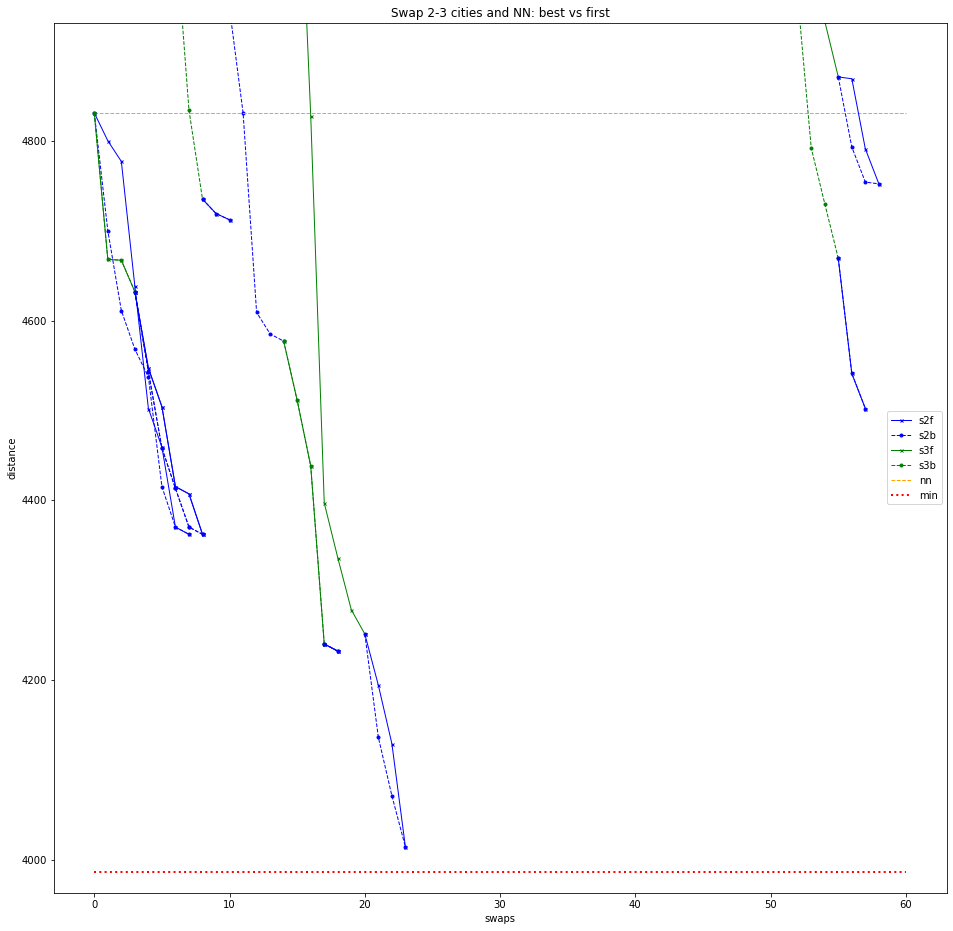

In [318]:
plt.figure(1, figsize=(16,16))
plt.title('Swap 2-3 cities and NN: best vs first', loc='center')
plt.plot(dm_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
plt.plot(dm_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(dm_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
plt.plot(dm_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
plt.plot(np.array([d_nn]*(len(dm_s2f)+len(dm_s2f_s3f)+len(dm_s2f_s3f_s2f))), color='orange', linestyle='dashed', linewidth=1)
plt.plot(np.array([d_minimal]*(len(dm_s2f)+len(dm_s2f_s3f)+len(dm_s2f_s3f_s2f))), color='red', linestyle='dotted', linewidth=2)
if d_s2f_s3f < d_s2f:
    plt.plot(np.arange(len(dm_s2f)-1, len(dm_s2f)+len(dm_s2f_s3f)-1), dm_s2f_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s2f_s3f_s2f < d_s2f_s3f:
        plt.plot(np.arange(len(dm_s2f)+len(dm_s2f_s3f)-2, len(dm_s2f)+len(dm_s2f_s3f)+len(dm_s2f_s3f_s2f)-2), dm_s2f_s3f_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s2f_s3f_s2b < d_s2f_s3f:
        plt.plot(np.arange(len(dm_s2f)+len(dm_s2f_s3f)-2, len(dm_s2f)+len(dm_s2f_s3f)+len(dm_s2f_s3f_s2b)-2), dm_s2f_s3f_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_s2f_s3b < d_s2f:
    plt.plot(np.arange(len(dm_s2f)-1, len(dm_s2f)+len(dm_s2f_s3b)-1), dm_s2f_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_s2f_s3b_s2f < d_s2f_s3b:
        plt.plot(np.arange(len(dm_s2f)+len(dm_s2f_s3b)-2, len(dm_s2f)+len(dm_s2f_s3b)+len(dm_s2f_s3b_s2f)-2), dm_s2f_s3b_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s2f_s3b_s2b < d_s2f_s3b:
        plt.plot(np.arange(len(dm_s2f)+len(dm_s2f_s3b)-2, len(dm_s2f)+len(dm_s2f_s3b)+len(dm_s2f_s3b_s2b)-2), dm_s2f_s3b_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_s2b_s3f < d_s2b:
    plt.plot(np.arange(len(dm_s2b)-1, len(dm_s2b)+len(dm_s2b_s3f)-1), dm_s2b_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s2b_s3f_s2f < d_s2b_s3f:
        plt.plot(np.arange(len(dm_s2b)+len(dm_s2b_s3f)-2, len(dm_s2b)+len(dm_s2b_s3f)+len(dm_s2b_s3f_s2f)-2), dm_s2b_s3f_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s2b_s3f_s2b < d_s2b_s3f:
        plt.plot(np.arange(len(dm_s2b)+len(dm_s2b_s3f)-2, len(dm_s2b)+len(dm_s2b_s3f)+len(dm_s2b_s3f_s2b)-2), dm_s2b_s3f_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_s2b_s3b < d_s2b:
    plt.plot(np.arange(len(dm_s2b)-1, len(dm_s2b)+len(dm_s2b_s3b)-1), dm_s2b_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_s2b_s3b_s2f < d_s2b_s3b:
        plt.plot(np.arange(len(dm_s2b)+len(dm_s2b_s3b)-2, len(dm_s2b)+len(dm_s2b_s3b)+len(dm_s2b_s3b_s2f)-2), dm_s2b_s3b_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s2b_s3b_s2b < d_s2b_s3b:
        plt.plot(np.arange(len(dm_s2b)+len(dm_s2b_s3b)-2, len(dm_s2b)+len(dm_s2b_s3b)+len(dm_s2b_s3b_s2b)-2), dm_s2b_s3b_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_s3f_s2f < d_s3f:
    plt.plot(np.arange(len(dm_s3f)-1, len(dm_s3f)+len(dm_s3f_s2f)-1), dm_s3f_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s3f_s2f_s3f < d_s3f_s2f:
        plt.plot(np.arange(len(dm_s3f)+len(dm_s3f_s2f)-2, len(dm_s3f)+len(dm_s3f_s2f)+len(dm_s3f_s2f_s3f)-2), dm_s3f_s2f_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s3f_s2f_s3b < d_s3f_s2f:
        plt.plot(np.arange(len(dm_s3f)+len(dm_s3f_s2f)-2, len(dm_s3f)+len(dm_s3f_s2f)+len(dm_s3f_s2f_s3b)-2), dm_s3f_s2f_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_s3f_s2b < d_s3f:
    plt.plot(np.arange(len(dm_s3f)-1, len(dm_s3f)+len(dm_s3f_s2b)-1), dm_s3f_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_s3f_s2b_s3f < d_s3f_s2b:
        plt.plot(np.arange(len(dm_s3f)+len(dm_s3f_s2b)-2, len(dm_s3f)+len(dm_s3f_s2b)+len(dm_s3f_s2b_s3f)-2), dm_s3f_s2b_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s3f_s2b_s3b < d_s3f_s2b:
        plt.plot(np.arange(len(dm_s3f)+len(dm_s3f_s2b)-2, len(dm_s3f)+len(dm_s3f_s2b)+len(dm_s3f_s2b_s3b)-2), dm_s3f_s2b_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_s3b_s2f < d_s3b:
    plt.plot(np.arange(len(dm_s3b)-1, len(dm_s3b)+len(dm_s3b_s2f)-1), dm_s3b_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s3b_s2f_s3f < d_s3b_s2f:
        plt.plot(np.arange(len(dm_s3b)+len(dm_s3b_s2f)-2, len(dm_s3b)+len(dm_s3b_s2f)+len(dm_s3b_s2f_s3f)-2), dm_s3b_s2f_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s3b_s2f_s3b < d_s3b_s2f:
        plt.plot(np.arange(len(dm_s3b)+len(dm_s3b_s2f)-2, len(dm_s3b)+len(dm_s3b_s2f)+len(dm_s3b_s2f_s3b)-2), dm_s3b_s2f_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_s3b_s2b < d_s3b:
    plt.plot(np.arange(len(dm_s3b)-1, len(dm_s3b)+len(dm_s3b_s2b)-1), dm_s3b_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_s3b_s2b_s3f < d_s3b_s2b:
        plt.plot(np.arange(len(dm_s3b)+len(dm_s3b_s2b)-2, len(dm_s3b)+len(dm_s3b_s2b)+len(dm_s3b_s2b_s3f)-2), dm_s3b_s2b_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_s3b_s2b_s3b < d_s3b_s2b:
        plt.plot(np.arange(len(dm_s3b)+len(dm_s3b_s2b)-2, len(dm_s3b)+len(dm_s3b_s2b)+len(dm_s3b_s2b_s3b)-2), dm_s3b_s2b_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)

if d_nn_s2f < d_nn:
    plt.plot(dm_nn_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_nn_s2f_s3f < d_nn_s2f:
        plt.plot(np.arange(len(dm_nn_s2f)-1, len(dm_nn_s2f)+len(dm_nn_s2f_s3f)-1), dm_nn_s2f_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s2f_s3f_s2f < d_nn_s2f_s3f:
            plt.plot(np.arange(len(dm_nn_s2f)+len(dm_nn_s2f_s3f)-2, len(dm_nn_s2f)+len(dm_nn_s2f_s3f)+len(dm_nn_s2f_s3f_s2f)-2), dm_nn_s2f_s3f_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s2f_s3f_s2b < d_nn_s2f_s3f:
            plt.plot(np.arange(len(dm_nn_s2f)+len(dm_nn_s2f_s3f)-2, len(dm_nn_s2f)+len(dm_nn_s2f_s3f)+len(dm_nn_s2f_s3f_s2b)-2), dm_nn_s2f_s3f_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_nn_s2f_s3b < d_nn_s2f:
        plt.plot(np.arange(len(dm_nn_s2f)-1, len(dm_nn_s2f)+len(dm_nn_s2f_s3b)-1), dm_nn_s2f_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
        if d_nn_s2f_s3b_s2f < d_nn_s2f_s3b:
            plt.plot(np.arange(len(dm_nn_s2f)+len(dm_nn_s2f_s3b)-2, len(dm_nn_s2f)+len(dm_nn_s2f_s3b)+len(dm_nn_s2f_s3b_s2f)-2), dm_nn_s2f_s3b_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s2f_s3b_s2b < d_nn_s2f_s3b:
            plt.plot(np.arange(len(dm_nn_s2f)+len(dm_nn_s2f_s3b)-2, len(dm_nn_s2f)+len(dm_nn_s2f_s3b)+len(dm_nn_s2f_s3b_s2b)-2), dm_nn_s2f_s3b_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_nn_s2b < d_nn:
    plt.plot(dm_nn_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_nn_s2b_s3f < d_nn_s2b:
        plt.plot(np.arange(len(dm_nn_s2b)-1, len(dm_nn_s2b)+len(dm_nn_s2b_s3f)-1), dm_nn_s2b_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s2b_s3f_s2f < d_nn_s2b_s3f:
            plt.plot(np.arange(len(dm_nn_s2b)+len(dm_nn_s2b_s3f)-2, len(dm_nn_s2b)+len(dm_nn_s2b_s3f)+len(dm_nn_s2b_s3f_s2f)-2), dm_nn_s2b_s3f_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s2b_s3f_s2b < d_nn_s2b_s3f:
            plt.plot(np.arange(len(dm_nn_s2b)+len(dm_nn_s2b_s3f)-2, len(dm_nn_s2b)+len(dm_nn_s2b_s3f)+len(dm_nn_s2b_s3f_s2b)-2), dm_nn_s2b_s3f_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_nn_s2b_s3b < d_nn_s2b:
        plt.plot(np.arange(len(dm_nn_s2b)-1, len(dm_nn_s2b)+len(dm_nn_s2b_s3b)-1), dm_nn_s2b_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
        if d_nn_s2b_s3b_s2f < d_nn_s2b_s3b:
            plt.plot(np.arange(len(dm_nn_s2b)+len(dm_nn_s2b_s3b)-2, len(dm_nn_s2b)+len(dm_nn_s2b_s3b)+len(dm_nn_s2b_s3b_s2f)-2), dm_nn_s2b_s3b_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s2b_s3b_s2b < d_nn_s2b_s3b:
            plt.plot(np.arange(len(dm_nn_s2b)+len(dm_nn_s2b_s3b)-2, len(dm_nn_s2b)+len(dm_nn_s2b_s3b)+len(dm_nn_s2b_s3b_s2b)-2), dm_nn_s2b_s3b_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_nn_s3f < d_nn:
    plt.plot(dm_nn_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
    if d_nn_s3f_s2f < d_nn_s3f:
        plt.plot(np.arange(len(dm_nn_s3f)-1, len(dm_nn_s3f)+len(dm_nn_s3f_s2f)-1), dm_nn_s3f_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s3f_s2f_s3f < d_nn_s3f_s2f:
            plt.plot(np.arange(len(dm_nn_s3f)+len(dm_nn_s3f_s2f)-2, len(dm_nn_s3f)+len(dm_nn_s3f_s2f)+len(dm_nn_s3f_s2f_s3f)-2), dm_nn_s3f_s2f_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s3f_s2f_s3b < d_nn_s3f_s2f:
            plt.plot(np.arange(len(dm_nn_s3f)+len(dm_nn_s3f_s2f)-2, len(dm_nn_s3f)+len(dm_nn_s3f_s2f)+len(dm_nn_s3f_s2f_s3b)-2), dm_nn_s3f_s2f_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_nn_s3f_s2b < d_nn_s3f:
        plt.plot(np.arange(len(dm_nn_s3f)-1, len(dm_nn_s3f)+len(dm_nn_s3f_s2b)-1), dm_nn_s3f_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
        if d_nn_s3f_s2b_s3f < d_nn_s3f_s2b:
            plt.plot(np.arange(len(dm_nn_s3f)+len(dm_nn_s3f_s2b)-2, len(dm_nn_s3f)+len(dm_nn_s3f_s2b)+len(dm_nn_s3f_s2b_s3f)-2), dm_nn_s3f_s2b_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s3f_s2b_s3b < d_nn_s3f_s2b:
            plt.plot(np.arange(len(dm_nn_s3f)+len(dm_nn_s3f_s2b)-2, len(dm_nn_s3f)+len(dm_nn_s3f_s2b)+len(dm_nn_s3f_s2b_s3b)-2), dm_nn_s3f_s2b_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
if d_nn_s3b < d_nn:
    plt.plot(dm_nn_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_nn_s3b_s2f < d_nn_s3b:
        plt.plot(np.arange(len(dm_nn_s3b)-1, len(dm_nn_s3b)+len(dm_nn_s3b_s2f)-1), dm_nn_s3b_s2f, color='blue', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s3b_s2f_s3f < d_nn_s3b_s2f:
            plt.plot(np.arange(len(dm_nn_s3b)+len(dm_nn_s3b_s2f)-2, len(dm_nn_s3b)+len(dm_nn_s3b_s2f)+len(dm_nn_s3b_s2f_s3f)-2), dm_nn_s3b_s2f_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s3b_s2f_s3b < d_nn_s3b_s2f:
            plt.plot(np.arange(len(dm_nn_s3b)+len(dm_nn_s3b_s2f)-2, len(dm_nn_s3b)+len(dm_nn_s3b_s2f)+len(dm_nn_s3b_s2f_s3b)-2), dm_nn_s3b_s2f_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)
    if d_nn_s3b_s2b < d_nn_s3b:
        plt.plot(np.arange(len(dm_nn_s3b)-1, len(dm_nn_s3b)+len(dm_nn_s3b_s2b)-1), dm_nn_s3b_s2b, color='blue', marker='o', linestyle='dashed', linewidth=1, markersize=3)
        if d_nn_s3b_s2b_s3f < d_nn_s3b_s2b:
            plt.plot(np.arange(len(dm_nn_s3b)+len(dm_nn_s3b_s2b)-2, len(dm_nn_s3b)+len(dm_nn_s3b_s2b)+len(dm_nn_s3b_s2b_s3f)-2), dm_nn_s3b_s2b_s3f, color='green', marker='x', linestyle='solid', linewidth=1, markersize=3)
        if d_nn_s3b_s2b_s3b < d_nn_s3b_s2b:
            plt.plot(np.arange(len(dm_nn_s3b)+len(dm_nn_s3b_s2b)-2, len(dm_nn_s3b)+len(dm_nn_s3b_s2b)+len(dm_nn_s3b_s2b_s3b)-2), dm_nn_s3b_s2b_s3b, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=3)

plt.xlabel("swaps")
plt.ylabel("distance")
#y_min = d_minimal - d_minimal % 100; y_max = dm_s2f[0] - dm_s2f[0] % 100 + 100
y_min = d_minimal-23; y_max = d_nn+100 # shorter paths
plt.ylim([y_min, y_max])
plt.legend(["s2f", "s2b", "s3f", "s3b", "nn", "min"])
plt.show()

In [319]:
d_best = {"nn":d_nn,
          "s2f":d_s2f,
          "s2b":d_s2b,
          "s3f":d_s3f,
          "s3b":d_s3b,
          "nn_s2f":d_nn_s2f,
          "nn_s2b":d_nn_s2b,
          "nn_s3f":d_nn_s3f,
          "nn_s3b":d_nn_s3b,
          "s2f_s3f":d_s2f_s3f,
          "s2f_s3b":d_s2f_s3b,
          "s2b_s3f":d_s2b_s3f,
          "s2b_s3b":d_s2b_s3b,
          "s3f_s2f":d_s3f_s2f,
          "s3f_s2b":d_s3f_s2b,
          "s3b_s2f":d_s3b_s2f,
          "s3b_s2b":d_s3b_s2b,
          "nn_s2f_s3f":d_nn_s2f_s3f,
          "nn_s2f_s3b":d_nn_s2f_s3b,
          "nn_s2b_s3f":d_nn_s2b_s3f,
          "nn_s2b_s3b":d_nn_s2b_s3b,
          "nn_s3f_s2f":d_nn_s3f_s2f,
          "nn_s3f_s2b":d_nn_s3f_s2b,
          "nn_s3b_s2f":d_nn_s3b_s2f,
          "nn_s3b_s2b":d_nn_s3b_s2b,
          "s2f_s3f_s2f":d_s2f_s3f_s2f,
          "s2f_s3f_s2b":d_s2f_s3f_s2b,
          "s2f_s3b_s2f":d_s2f_s3b_s2f,
          "s2f_s3b_s2b":d_s2f_s3b_s2b,
          "s2b_s3f_s2f":d_s2b_s3f_s2f,
          "s2b_s3f_s2b":d_s2b_s3f_s2b,
          "s2b_s3b_s2f":d_s2b_s3b_s2f,
          "s2b_s3b_s2b":d_s2b_s3b_s2b,
          "s3f_s2f_s3f":d_s3f_s2f_s3f,
          "s3f_s2f_s3b":d_s3f_s2f_s3b,
          "s3f_s2b_s3f":d_s3f_s2b_s3f,
          "s3f_s2b_s3b":d_s3f_s2b_s3b,
          "s3b_s2f_s3f":d_s3b_s2f_s3f,
          "s3b_s2f_s3b":d_s3b_s2f_s3b,
          "s3b_s2b_s3f":d_s3b_s2b_s3f,
          "s3b_s2b_s3b":d_s3b_s2b_s3b,
          "nn_s2f_s3f_s2f":d_nn_s2f_s3f_s2f,
          "nn_s2f_s3f_s2b":d_nn_s2f_s3f_s2b,
          "nn_s2f_s3b_s2f":d_nn_s2f_s3b_s2f,
          "nn_s2f_s3b_s2b":d_nn_s2f_s3b_s2b,
          "nn_s2b_s3f_s2f":d_nn_s2b_s3f_s2f,
          "nn_s2b_s3f_s2b":d_nn_s2b_s3f_s2b,
          "nn_s2b_s3b_s2f":d_nn_s2b_s3b_s2f,
          "nn_s2b_s3b_s2b":d_nn_s2b_s3b_s2b,
          "nn_s3f_s2f_s3f":d_nn_s3f_s2f_s3f,
          "nn_s3f_s2f_s3b":d_nn_s3f_s2f_s3b,
          "nn_s3f_s2b_s3f":d_nn_s3f_s2b_s3f,
          "nn_s3f_s2b_s3b":d_nn_s3f_s2b_s3b,
          "nn_s3b_s2f_s3f":d_nn_s3b_s2f_s3f,
          "nn_s3b_s2f_s3b":d_nn_s3b_s2f_s3b,
          "nn_s3b_s2b_s3f":d_nn_s3b_s2b_s3f,
          "nn_s3b_s2b_s3b":d_nn_s3b_s2b_s3b,
          "optimal":d_opt,
          "minimal":d_minimal}
d_best = sorted(d_best.items(), key=lambda x:x[1])
sortdict = dict(d_best)
print(sortdict)

{'optimal': 3986.1, 'minimal': 3986.1, 's3f_s2f': 4014.1, 's3f_s2b': 4014.1, 's3f_s2f_s3f': 4014.1, 's3f_s2f_s3b': 4014.1, 's3f_s2b_s3f': 4014.1, 's3f_s2b_s3b': 4014.1, 's2b_s3f_s2f': 4232.1, 's2b_s3f_s2b': 4232.1, 's2b_s3b_s2f': 4232.1, 's2b_s3b_s2b': 4232.1, 's2b_s3f': 4240.1, 's2b_s3b': 4240.1, 's3f': 4251.1, 'nn_s2f': 4362.1, 'nn_s2b': 4362.1, 'nn_s2f_s3f': 4362.1, 'nn_s2f_s3b': 4362.1, 'nn_s2b_s3f': 4362.1, 'nn_s2b_s3b': 4362.1, 'nn_s3f_s2f': 4362.1, 'nn_s3f_s2b': 4362.1, 'nn_s3b_s2f': 4362.1, 'nn_s3b_s2b': 4362.1, 'nn_s2f_s3f_s2f': 4362.1, 'nn_s2f_s3f_s2b': 4362.1, 'nn_s2f_s3b_s2f': 4362.1, 'nn_s2f_s3b_s2b': 4362.1, 'nn_s2b_s3f_s2f': 4362.1, 'nn_s2b_s3f_s2b': 4362.1, 'nn_s2b_s3b_s2f': 4362.1, 'nn_s2b_s3b_s2b': 4362.1, 'nn_s3f_s2f_s3f': 4362.1, 'nn_s3f_s2f_s3b': 4362.1, 'nn_s3f_s2b_s3f': 4362.1, 'nn_s3f_s2b_s3b': 4362.1, 'nn_s3b_s2f_s3f': 4362.1, 'nn_s3b_s2f_s3b': 4362.1, 'nn_s3b_s2b_s3f': 4362.1, 'nn_s3b_s2b_s3b': 4362.1, 's2f_s3b_s2f': 4502.1, 's2f_s3b_s2b': 4502.1, 's2b': 4577.